In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200

In [3]:
data = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

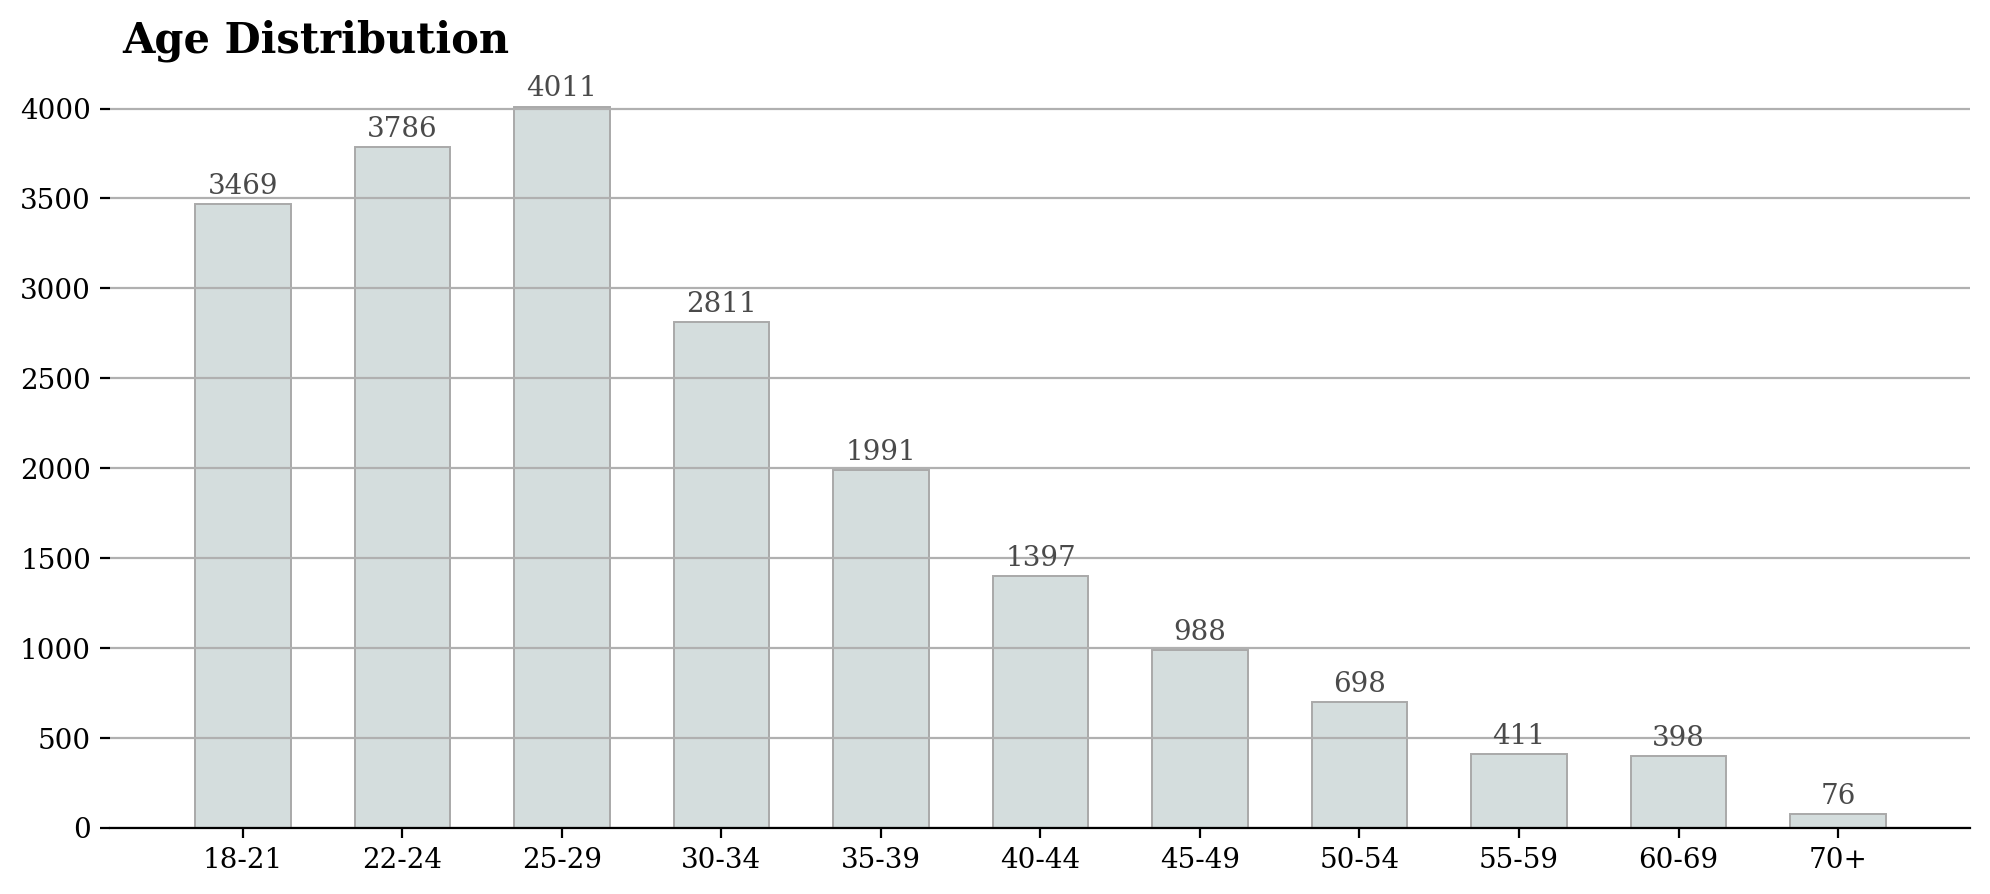

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
data_q1 = data['Q1'].value_counts().sort_index()

ax.bar(data_q1.index, data_q1.values, width=0.6, linewidth=0.7,
       edgecolor='darkgray', color='#d4dddd')

for i in data_q1.index:
    ax.annotate(data_q1[i], xy=(i, data_q1[i] + 100), va='center', ha='center',
               fontweight='light', fontfamily='serif', color='#4a4a4a')
    
for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)

ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500), fontfamily='serif')
fig.text(0.13, 0.9, 'Age Distribution', fontsize=15, fontweight='bold',
         fontfamily='serif')
ax.grid(axis='y', linestyle='-')
plt.show()

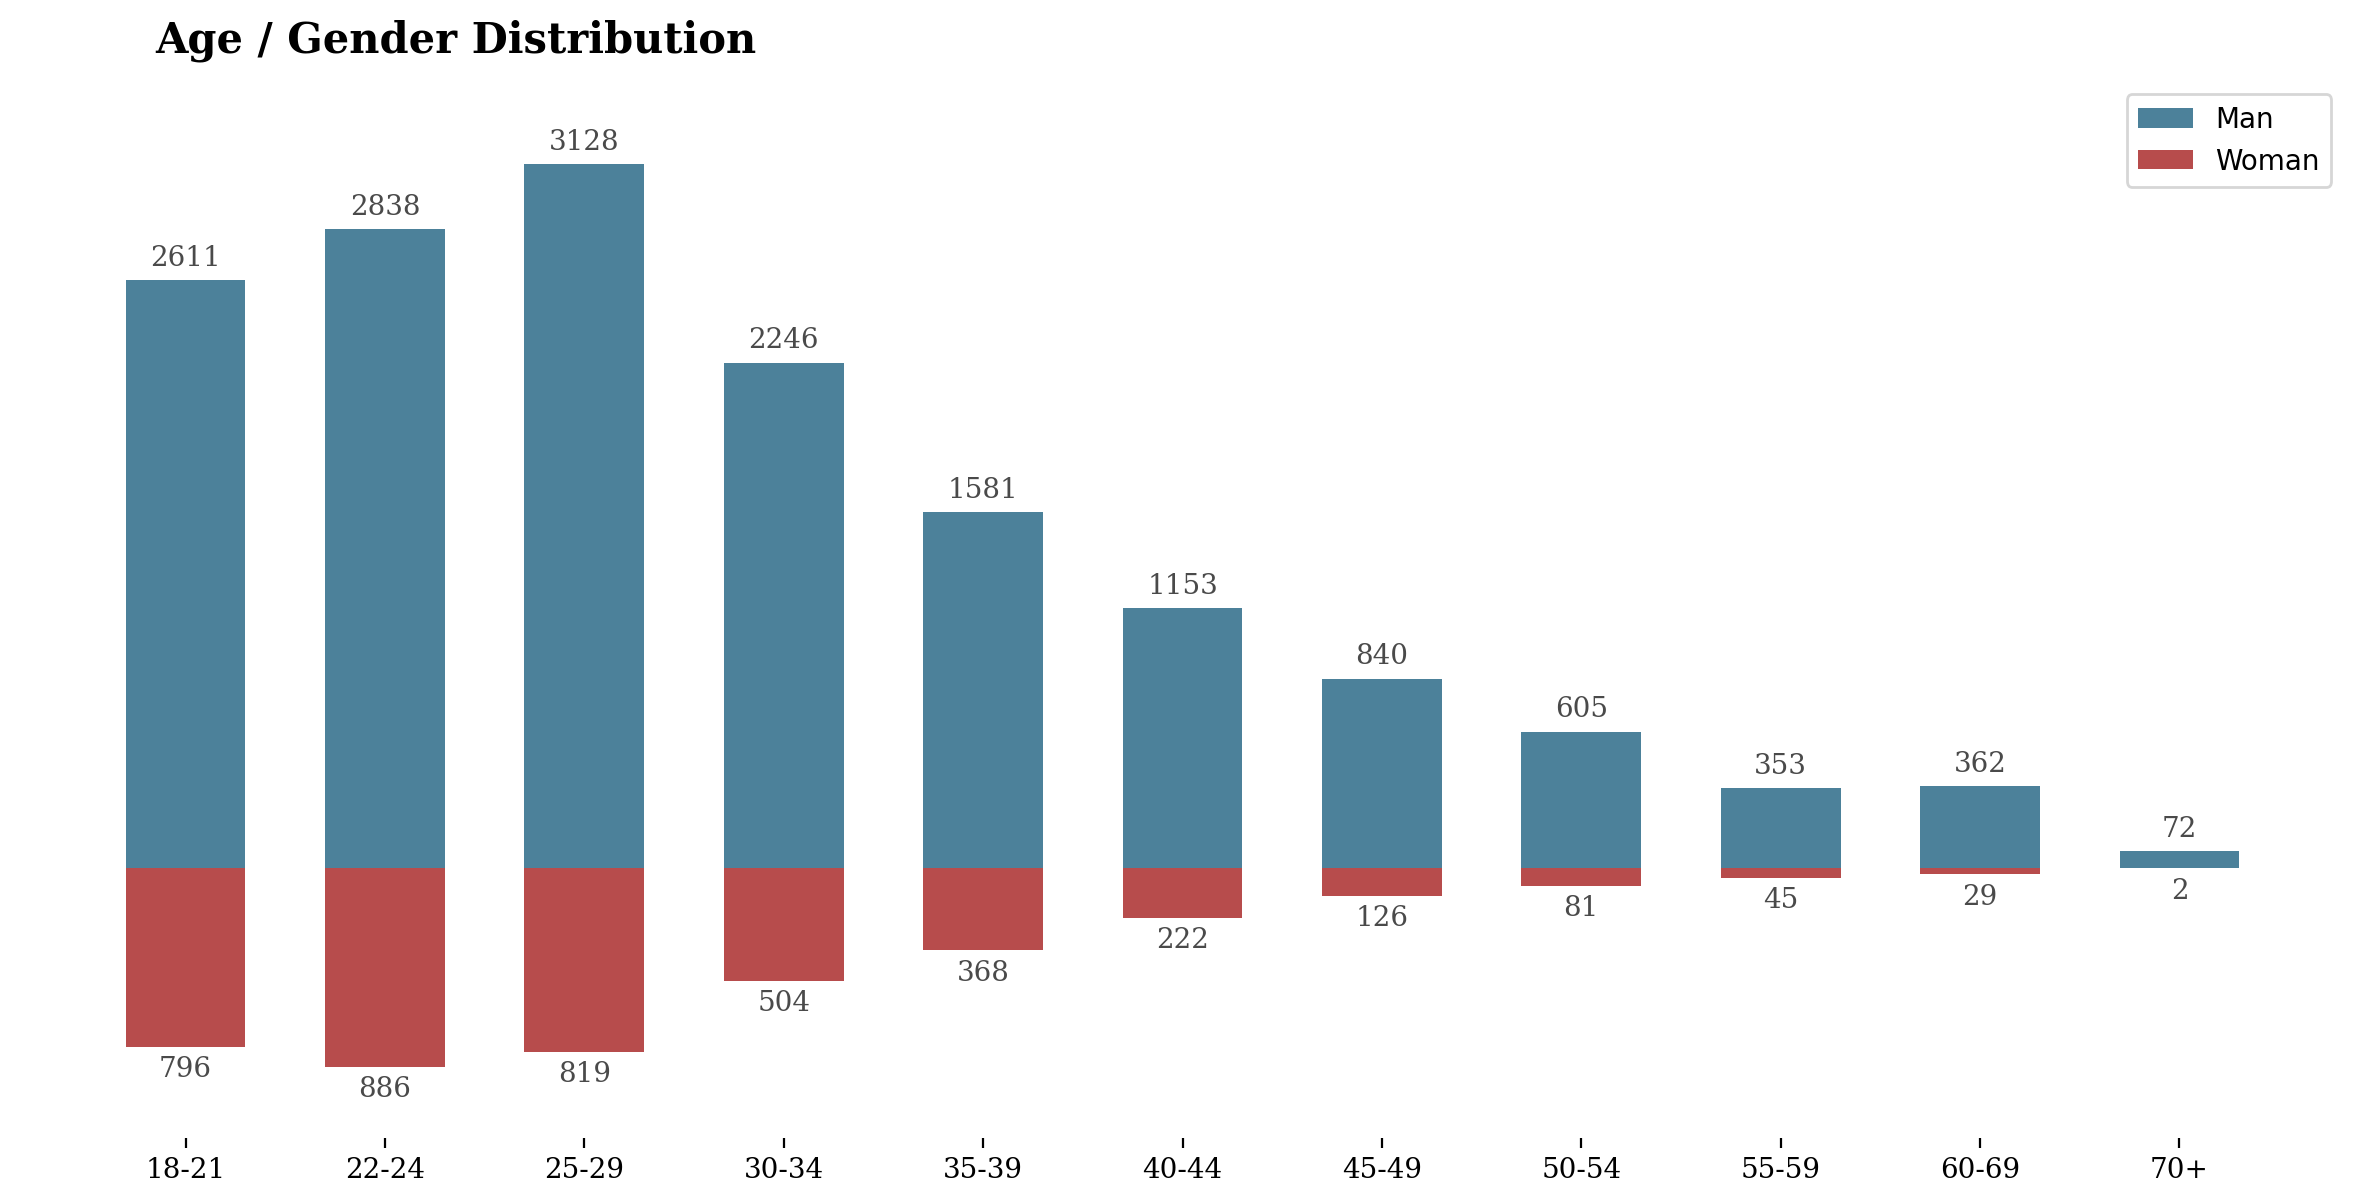

In [5]:
data.loc[-data['Q2'].isin(['Man', 'Woman']), 'Q2'] = 'ETC'
data_q1q2 = data[data['Q2'] != 'ETC'].groupby('Q2')['Q1'].value_counts().unstack()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.bar(man.index, man, width=0.6, label='Man', color='#004c70', alpha=0.7)
ax.bar(woman.index, woman, width=0.6, label='Woman', color='#990000', alpha=0.7)
ax.set_ylim(-1200, 3500)

for i in ['top', 'bottom', 'right', 'left']:
    ax.spines[i].set_visible(False)
    
for i in data_q1q2.columns:
    ax.annotate(data_q1q2[i]['Man'], xy=(i, data_q1q2[i]['Man'] + 100), color='#4a4a4a',
                ha='center', va='center', fontweight='light', fontfamily='serif')
    ax.annotate(data_q1q2[i]['Woman'], xy=(i, -data_q1q2[i]['Woman'] - 100), color='#4a4a4a',
               ha='center', va='center', fontweight='light', fontfamily='serif')
ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
fig.text(0.17, 0.9, 'Age / Gender Distribution', fontsize=15, fontfamily='serif', fontweight='bold')
plt.legend()
plt.show()

In [6]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['Sum'] = data_q2q3.sum(axis=1)
q2q3_ratio = (data_q2q3.T / data_q2q3['Sum']).T[['Man', 'Woman', 'ETC']].rename(
    index={'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]

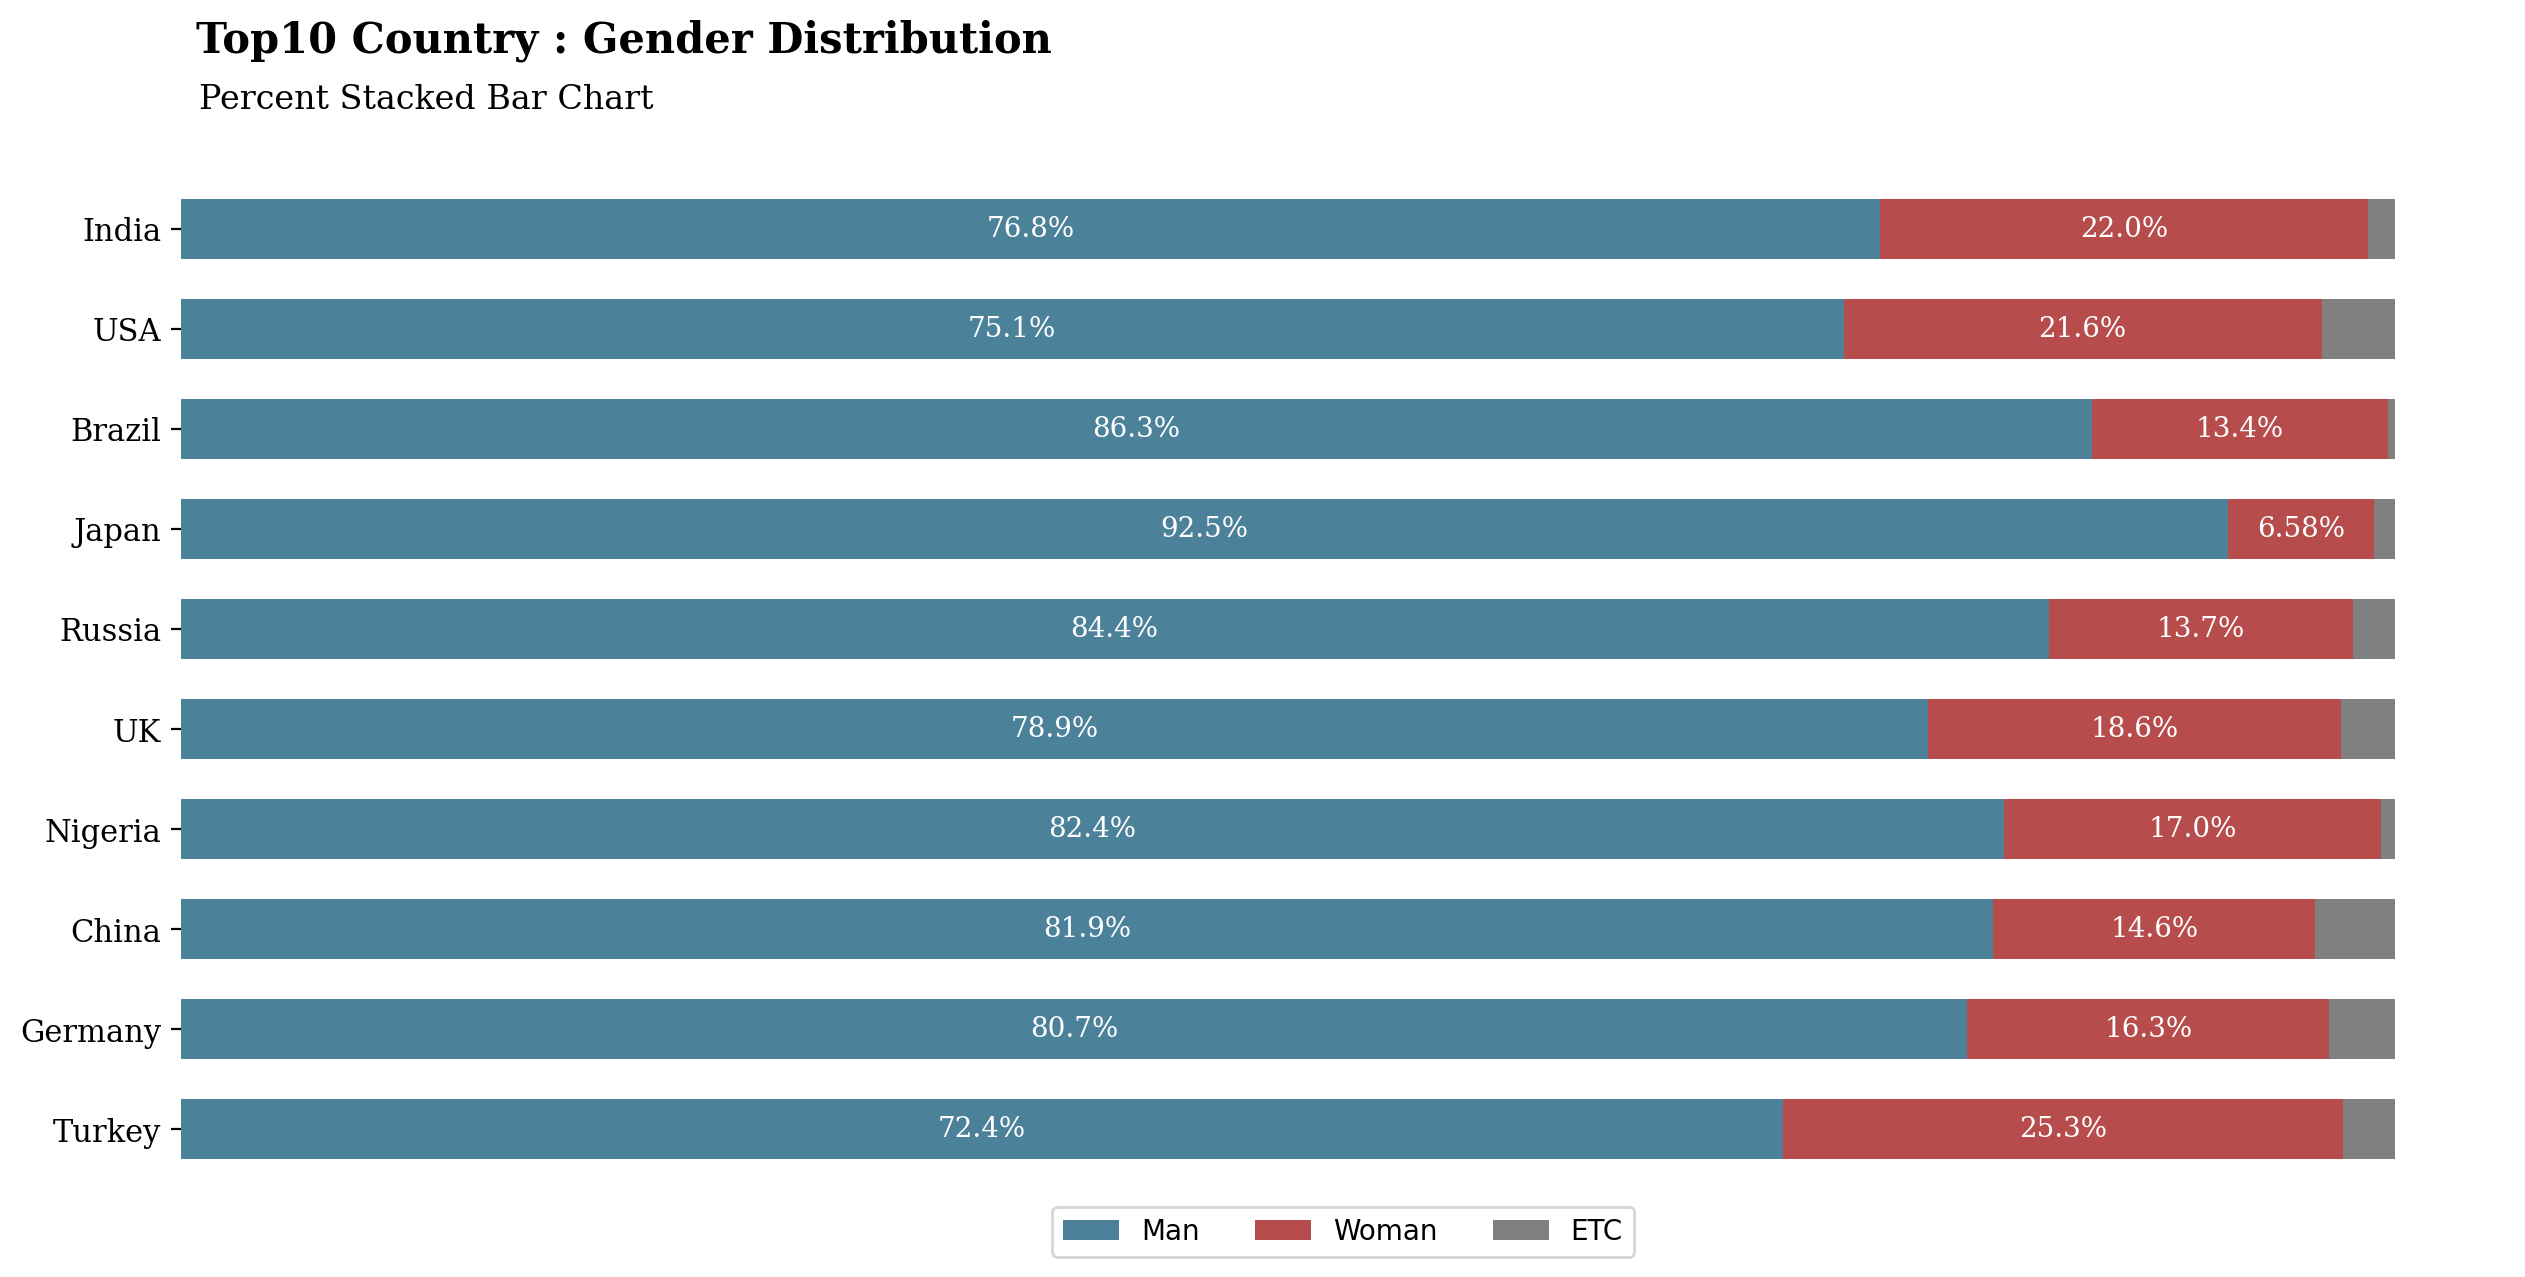

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

ax.barh(q2q3_ratio.index, q2q3_ratio['Man'], height=0.6, alpha=0.7, color='#004c70', label='Man')
ax.barh(q2q3_ratio.index, q2q3_ratio['Woman'], height=0.6, alpha=0.7,
        left=q2q3_ratio['Man'], color='#990000', label='Woman')
ax.barh(q2q3_ratio.index, q2q3_ratio['ETC'], height=0.6, alpha=0.7,
        left=q2q3_ratio['Man'] + q2q3_ratio['Woman'], color='#4a4a4a', label='ETC')

for i in q2q3_ratio.index:
    ax.annotate(f"{q2q3_ratio['Man'][i]*100:.3}%", xy=(q2q3_ratio['Man'][i] / 2, i), 
               ha='center', va='center', fontfamily='serif', fontweight='light', color='white')
    ax.annotate(f"{q2q3_ratio['Woman'][i]*100:.3}%", color='white',
                xy=(q2q3_ratio['Man'][i] + q2q3_ratio['Woman'][i] / 2, i), 
               ha='center', va='center', fontfamily='serif', fontweight='light')
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
    
ax.set_xticks([])
ax.set_yticklabels(q2q3_ratio.index, fontfamily='serif', fontsize=11)
fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

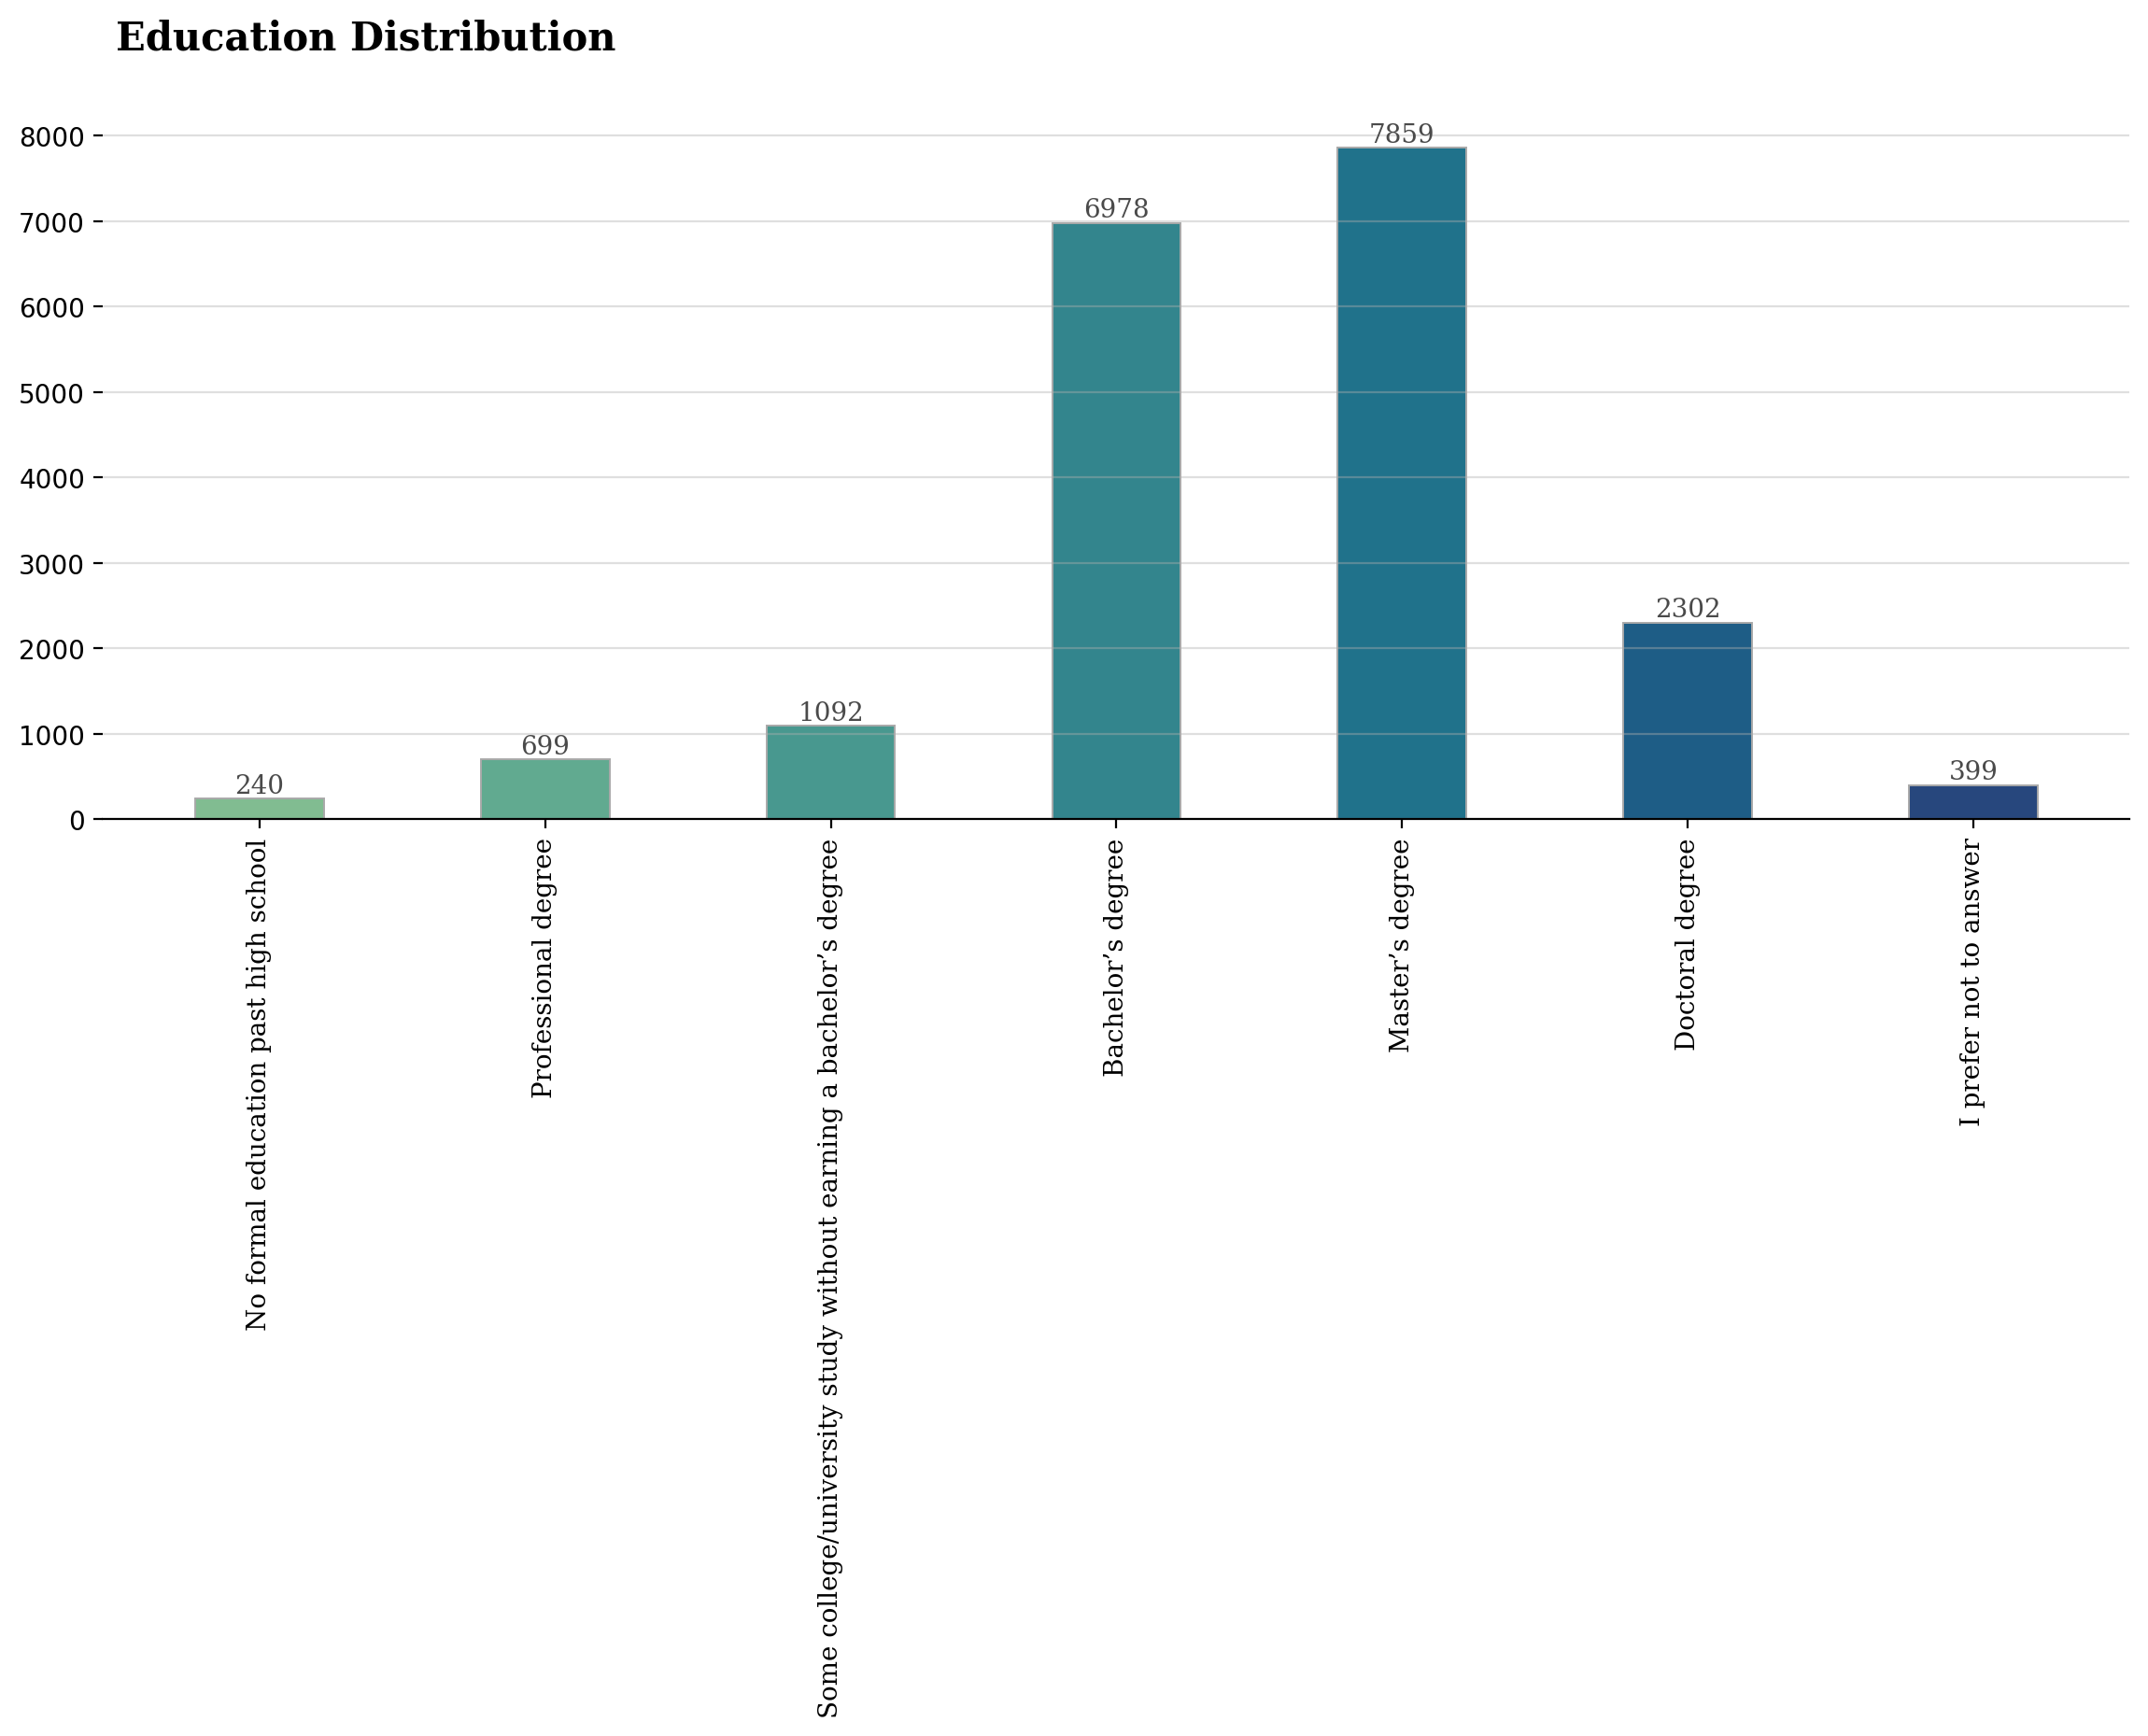

In [8]:
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer'
]
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
data_q4 = data['Q4'].value_counts()[q4_order]
ax.bar(data_q4.index, data_q4, width=0.45, edgecolor='darkgray',
       color=sns.color_palette("crest", 7), linewidth=0.7)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", xy=(i, data_q4[i] + 150), ha='center', va='center',
                fontweight='light', fontfamily='serif', color='#4a4a4a')

for i in ['top', 'right', 'left']:
    ax.spines[i].set_visible(False)
    
ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(0.13, 0.95, 'Education Distribution', fontweight='bold', fontfamily='serif', fontsize=15)
    
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

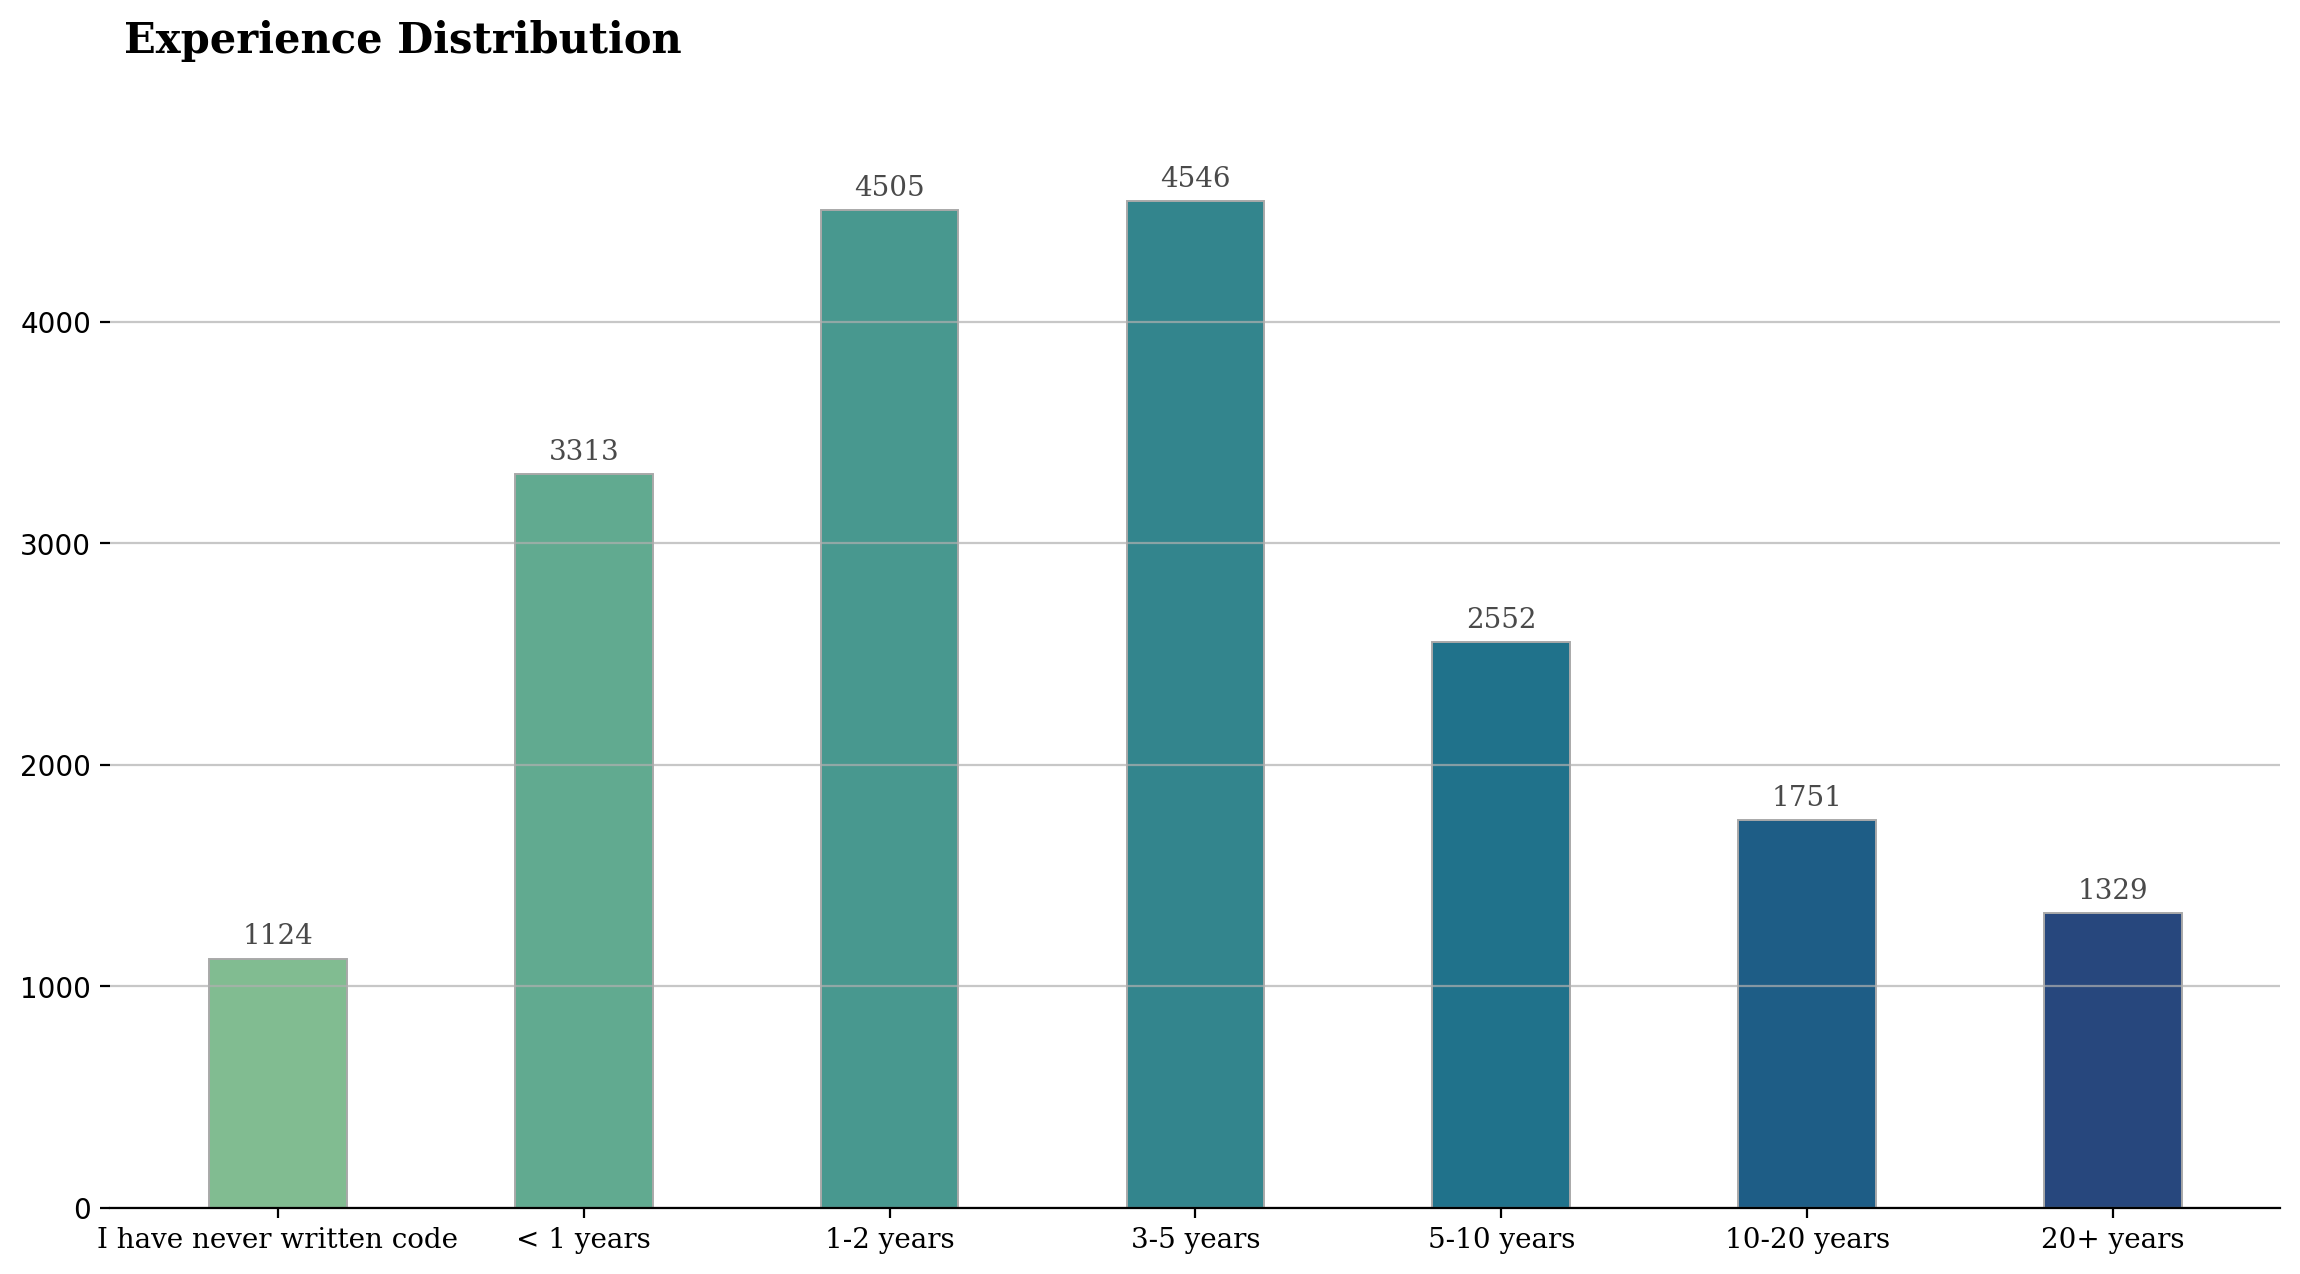

In [9]:
q6_order= [
    'I have never written code',
    '< 1 years',
    '1-2 years',
    '3-5 years',
    '5-10 years',
    '10-20 years',
    '20+ years'
]
data_q6 = data['Q6'].value_counts()[q6_order]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(data_q6.index, data_q6, color=sns.color_palette("crest", 7), linewidth=0.7, 
      edgecolor='darkgray', width=0.45)
for i in data_q6.index:
    ax.annotate(f'{data_q6[i]}', xy=(i, data_q6[i] + 100), color='#4a4a4a', 
               fontfamily='serif', fontweight='light', ha='center', va='center')
for i in ['top', 'right', 'left']:
    ax.spines[i].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.7)
ax.set_xticklabels(data_q6.index, fontfamily='serif')
fig.text(0.13, 0.95, 'Experience Distribution', fontweight='bold', fontfamily='serif', fontsize=15)
plt.show()

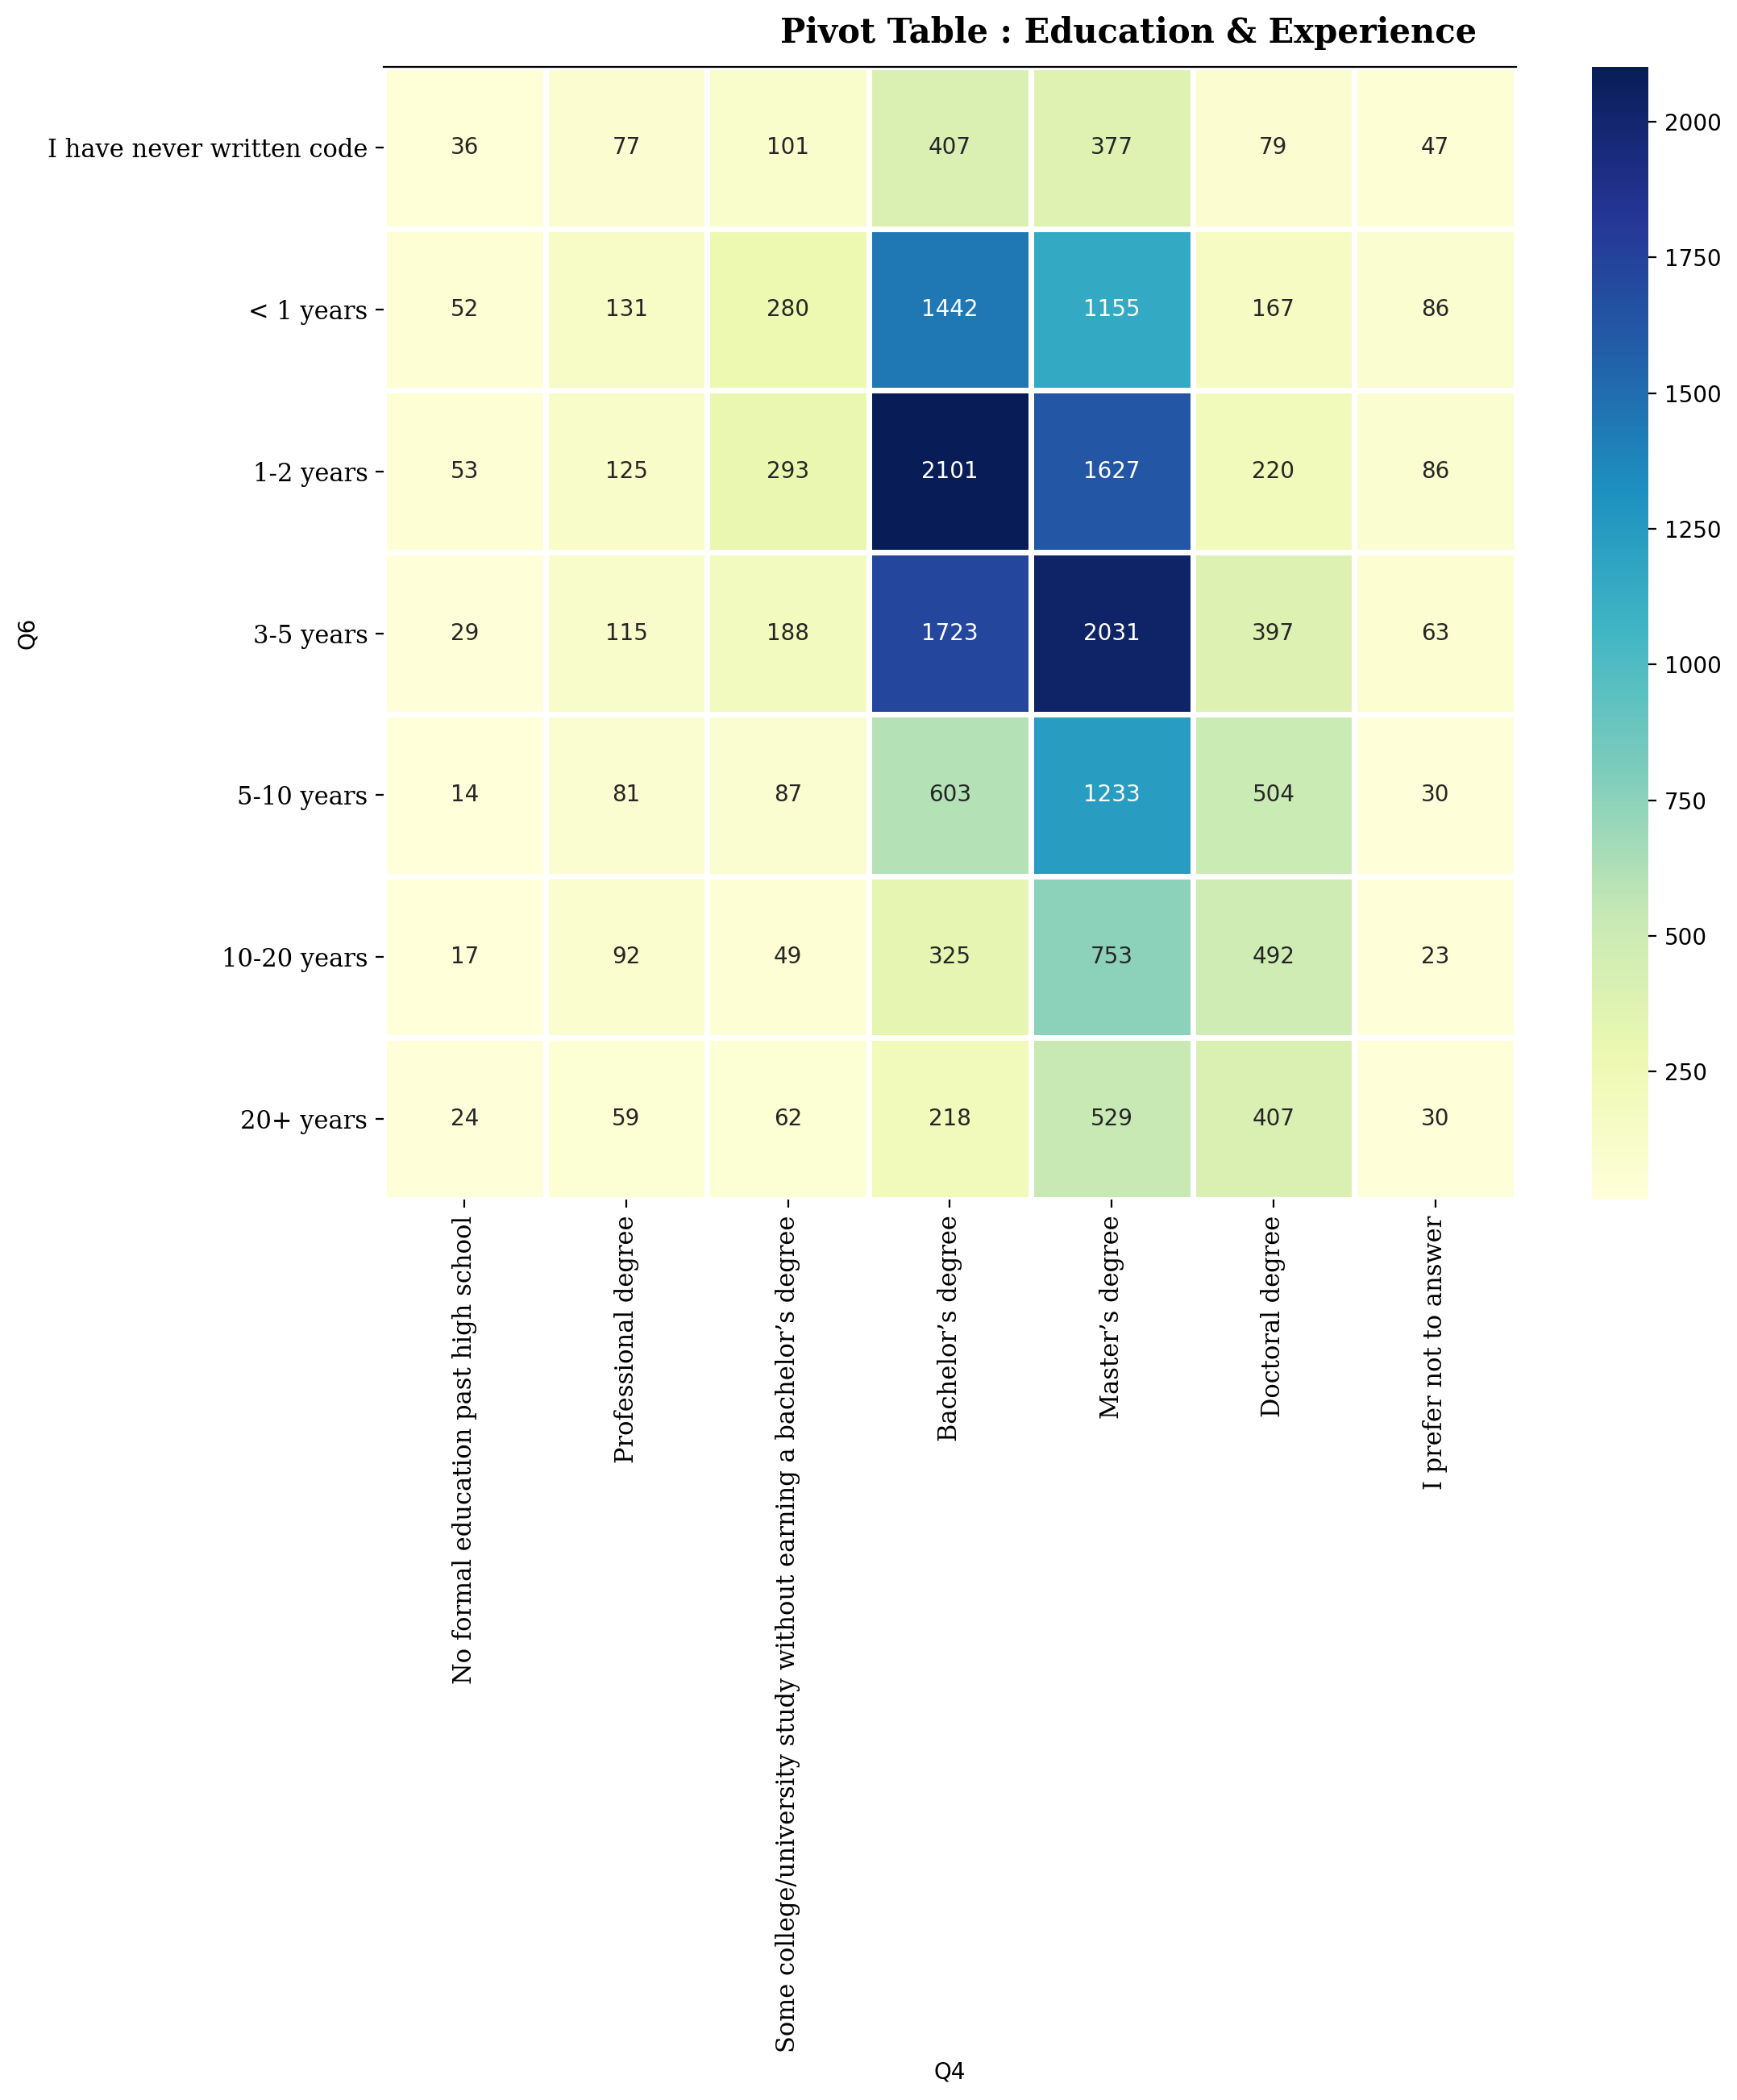

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
data['count'] = 1
q4q6_data = pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order]
sns.heatmap(q4q6_data, cmap='YlGnBu', square=True, linewidth=2.5, ax=ax, annot=True, fmt='d')

ax.spines['top'].set_visible(True)
fig.text(0.45, 1, 'Pivot Table : Education & Experience', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_xticklabels(q4q6_data.columns, fontsize=11, fontfamily='serif')
ax.set_yticklabels(q4q6_data.index, fontsize=11, fontfamily='serif')
plt.tight_layout()
plt.show()

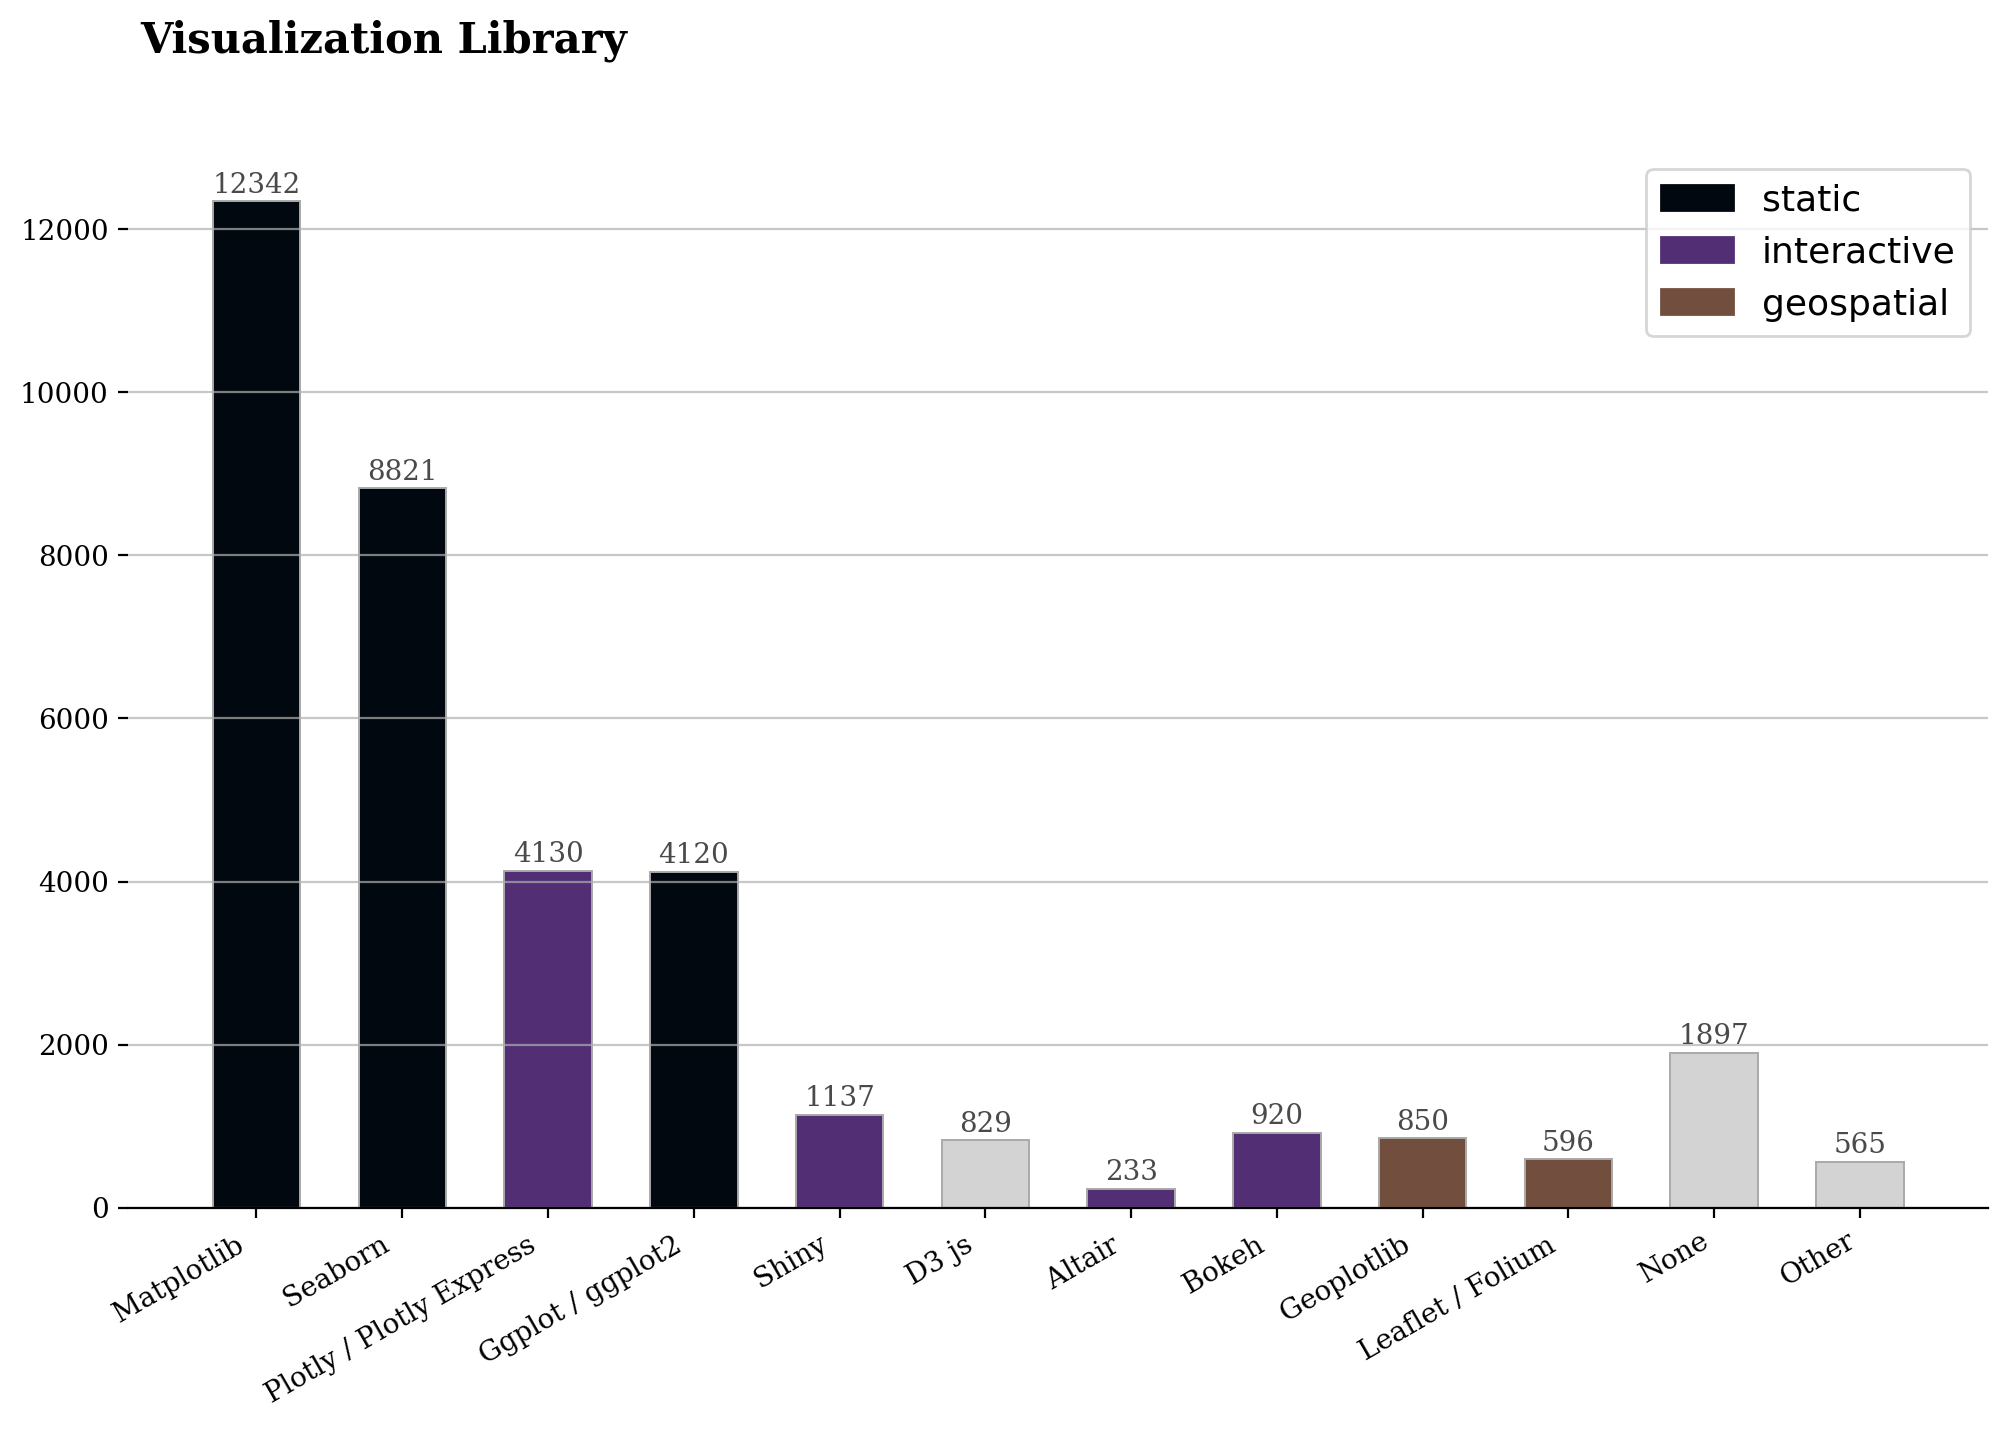

In [11]:
q14_data = data[[i for i in data.columns if 'Q14' in i]]
q14_data_count = pd.Series(dtype='int')
for i in q14_data.columns:
    q14_data_count[q14_data[i].value_counts().index[0]] = q14_data[i].count()
colors = ['lightgray'] * 14 
colors[0] = colors[1] = colors[3] = '#02080F'
colors[2] = colors[4] = colors[6] = colors[7] = '#522e75'
colors[8] = colors[9] = '#714e3d'

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.bar(q14_data_count.index, q14_data_count.values, width=0.6,
       color=colors, edgecolor='darkgray', linewidth=0.7)

for i in q14_data_count.index:
    ax.annotate(f'{q14_data_count[i]}', xy=(i, q14_data_count[i] + 200), va='center',
                ha='center', fontfamily='serif', fontweight='light', color='#4a4a4a')
    
for i in ['top', 'right', 'left']:
    ax.spines[i].set_visible(False)
    
ax.grid(axis='y', alpha=0.7, linestyle='-')
ax.set_yticklabels(np.arange(0, 12001, 2000), fontfamily='serif')
ax.set_xticklabels(q14_data_count.index, fontfamily='serif', rotation=30, va='top', ha='right')
fig.text(0.13, 0.95, 'Visualization Library', fontfamily='serif', fontsize=15, fontweight='bold')

static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')
plt.legend(handles=[static, interactive, geo], fontsize=13)
plt.show()

In [12]:
q5_order = ['Business Analyst'
 ,'Data Analyst'
 ,'Data Engineer'
 ,'Data Scientist'
 ,'DBA/Database Engineer'
 ,'Machine Learning Engineer'
 ,'Product/Project Manager'
 ,'Research Scientist'
 ,'Software Engineer'
 ,'Statistician'
 ,'Student'
 ,'Currently not employed'
 ,'Other']
q5_order = q5_order[::-1]
q15_order = [
    'I do not use machine learning methods'
    ,'Under 1 year'
    ,'1-2 years'
    ,'2-3 years'
    ,'3-4 years'
    ,'4-5 years'
    ,'5-10 years'
    ,'10-20 years'
    ,'20 or more years']

q5q15_data = pd.pivot_table(data, values='count', index='Q5', columns='Q15',
               aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
q5q15_data_man = pd.pivot_table(data[data['Q2'] == 'Man'], values='count', index='Q5',
                                columns='Q15',aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
q5q15_data_woman = pd.pivot_table(data[data['Q2'] == 'Woman'], values='count', index='Q5',
                                columns='Q15',aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()

In [13]:
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    for ratio, color in zip(ratios, colors):
        r = 2 * np.pi * ratio + previous
        x = [0] + np.cos(np.linspace(previous, r, 30)).tolist() + [0]
        y = [0] + np.sin(np.linspace(previous, r, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = r
        markers.append({'marker':xy, 's':np.abs(xy).max()**2 * sizes, 'facecolor':color})
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)

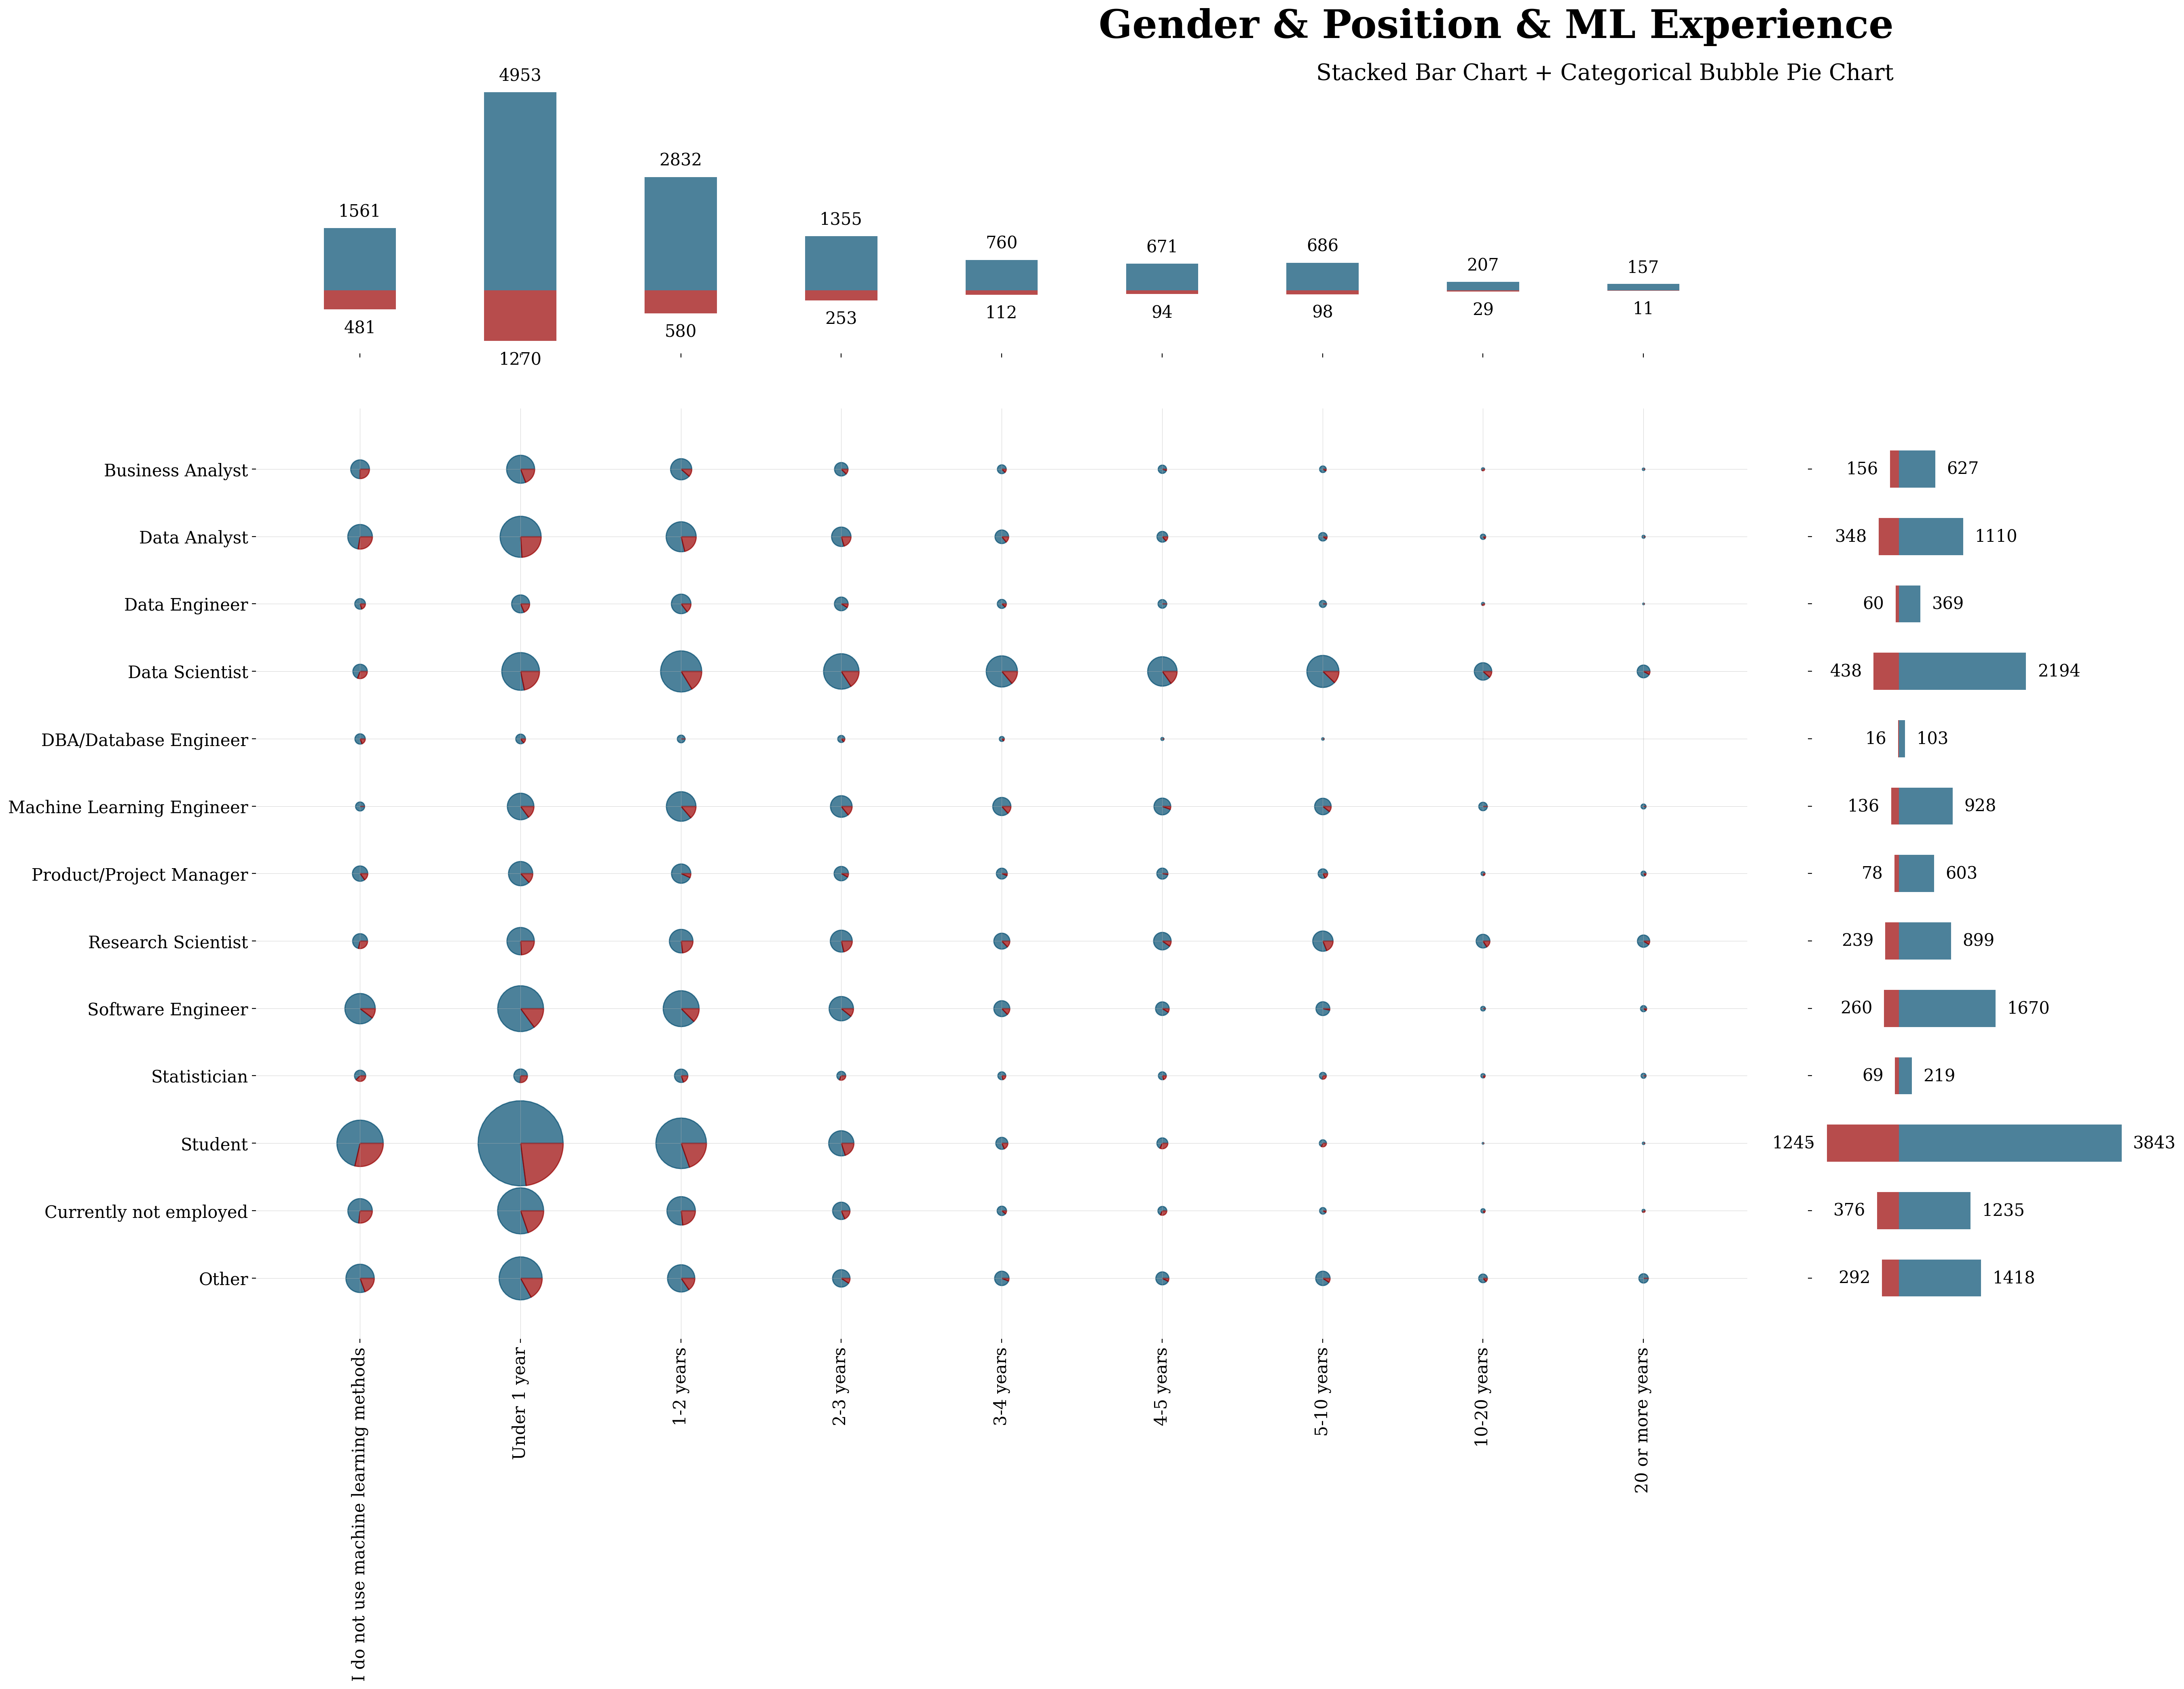

In [20]:
fig = plt.figure(figsize=(30, 26), dpi=200)
gs = fig.add_gridspec(5, 5)
ax_plot = fig.add_subplot(gs[1:4, 0:4])

for q5_index in q5_order:
    for q15_index in q15_order:
        man = q5q15_data_man[q5_index][q15_index]
        woman = q5q15_data_woman[q5_index][q15_index]
        total = q5q15_data[q5_index][q15_index]
        drawPieMarker(q15_index, q5_index, [man / (man + woman), woman / (man + woman)],
                      total * 2.5, ['#004c70', '#990000'], ax_plot)
        
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot)
q15_woman = data[data['Q2'] == 'Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(q15_woman.index, -q15_woman, width=0.45, alpha=0.7, color='#990000')

q15_man = data[data['Q2'] == 'Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(q15_man.index, q15_man, width=0.45, alpha=0.7, color='#004c70')
plt.setp(ax_pos.get_xticklabels(), visible=False)
plt.setp(ax_pos.get_yticklabels(), visible=False)
ax_pos.set_yticks([])

for i in q15_order:
    ax_pos.annotate(f'{q15_man[i]}', xy=(i, q15_man[i] + 200), fontfamily='serif', 
                   ha='center', va='bottom', fontsize=15)
    ax_pos.annotate(f'{q15_woman[i]}', xy=(i, -q15_woman[i] - 250), fontfamily='serif',
                   ha='center', va='top', fontsize=15)

ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot)
q5_woman = data[data['Q2'] == 'Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(q5_woman.index, -q5_woman, height=0.55, alpha=0.7, color='#990000')

q5_man = data[data['Q2'] == 'Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(q5_man.index, q5_man, height=0.55, alpha=0.7, color='#004c70')
plt.setp(ax_exp.get_yticklabels(), visible=False)
plt.setp(ax_exp.get_xticklabels(), visible=False)
ax_exp.set_xticks([])

for i in q5_order:
    ax_exp.annotate(f'{q5_man[i]}', xy=(q5_man[i] + 200, i), fontsize=15,
                    fontfamily='serif', va='center', ha='left')
    ax_exp.annotate(f'{q5_woman[i]}', xy=(-q5_woman[i] - 200, i), fontsize=15,
                    fontfamily='serif', va='center', ha='right')


for i in ['top', 'bottom', 'left', 'right']:
    ax_plot.spines[i].set_visible(False)
    ax_pos.spines[i].set_visible(False)
    ax_exp.spines[i].set_visible(False)
    
fig.text(0.8, 0.9, 'Gender & Position & ML Experience', fontweight='bold',
         fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart',
         fontweight='light', fontfamily='serif', fontsize=20, ha='right')
ax_plot.grid(linewidth=0.2, zorder=0)
ax_plot.set_xticklabels(q15_order, fontsize=15, fontfamily='serif', rotation=90)
ax_plot.set_yticklabels(q5_order, fontsize=15, fontfamily='serif')
plt.show()

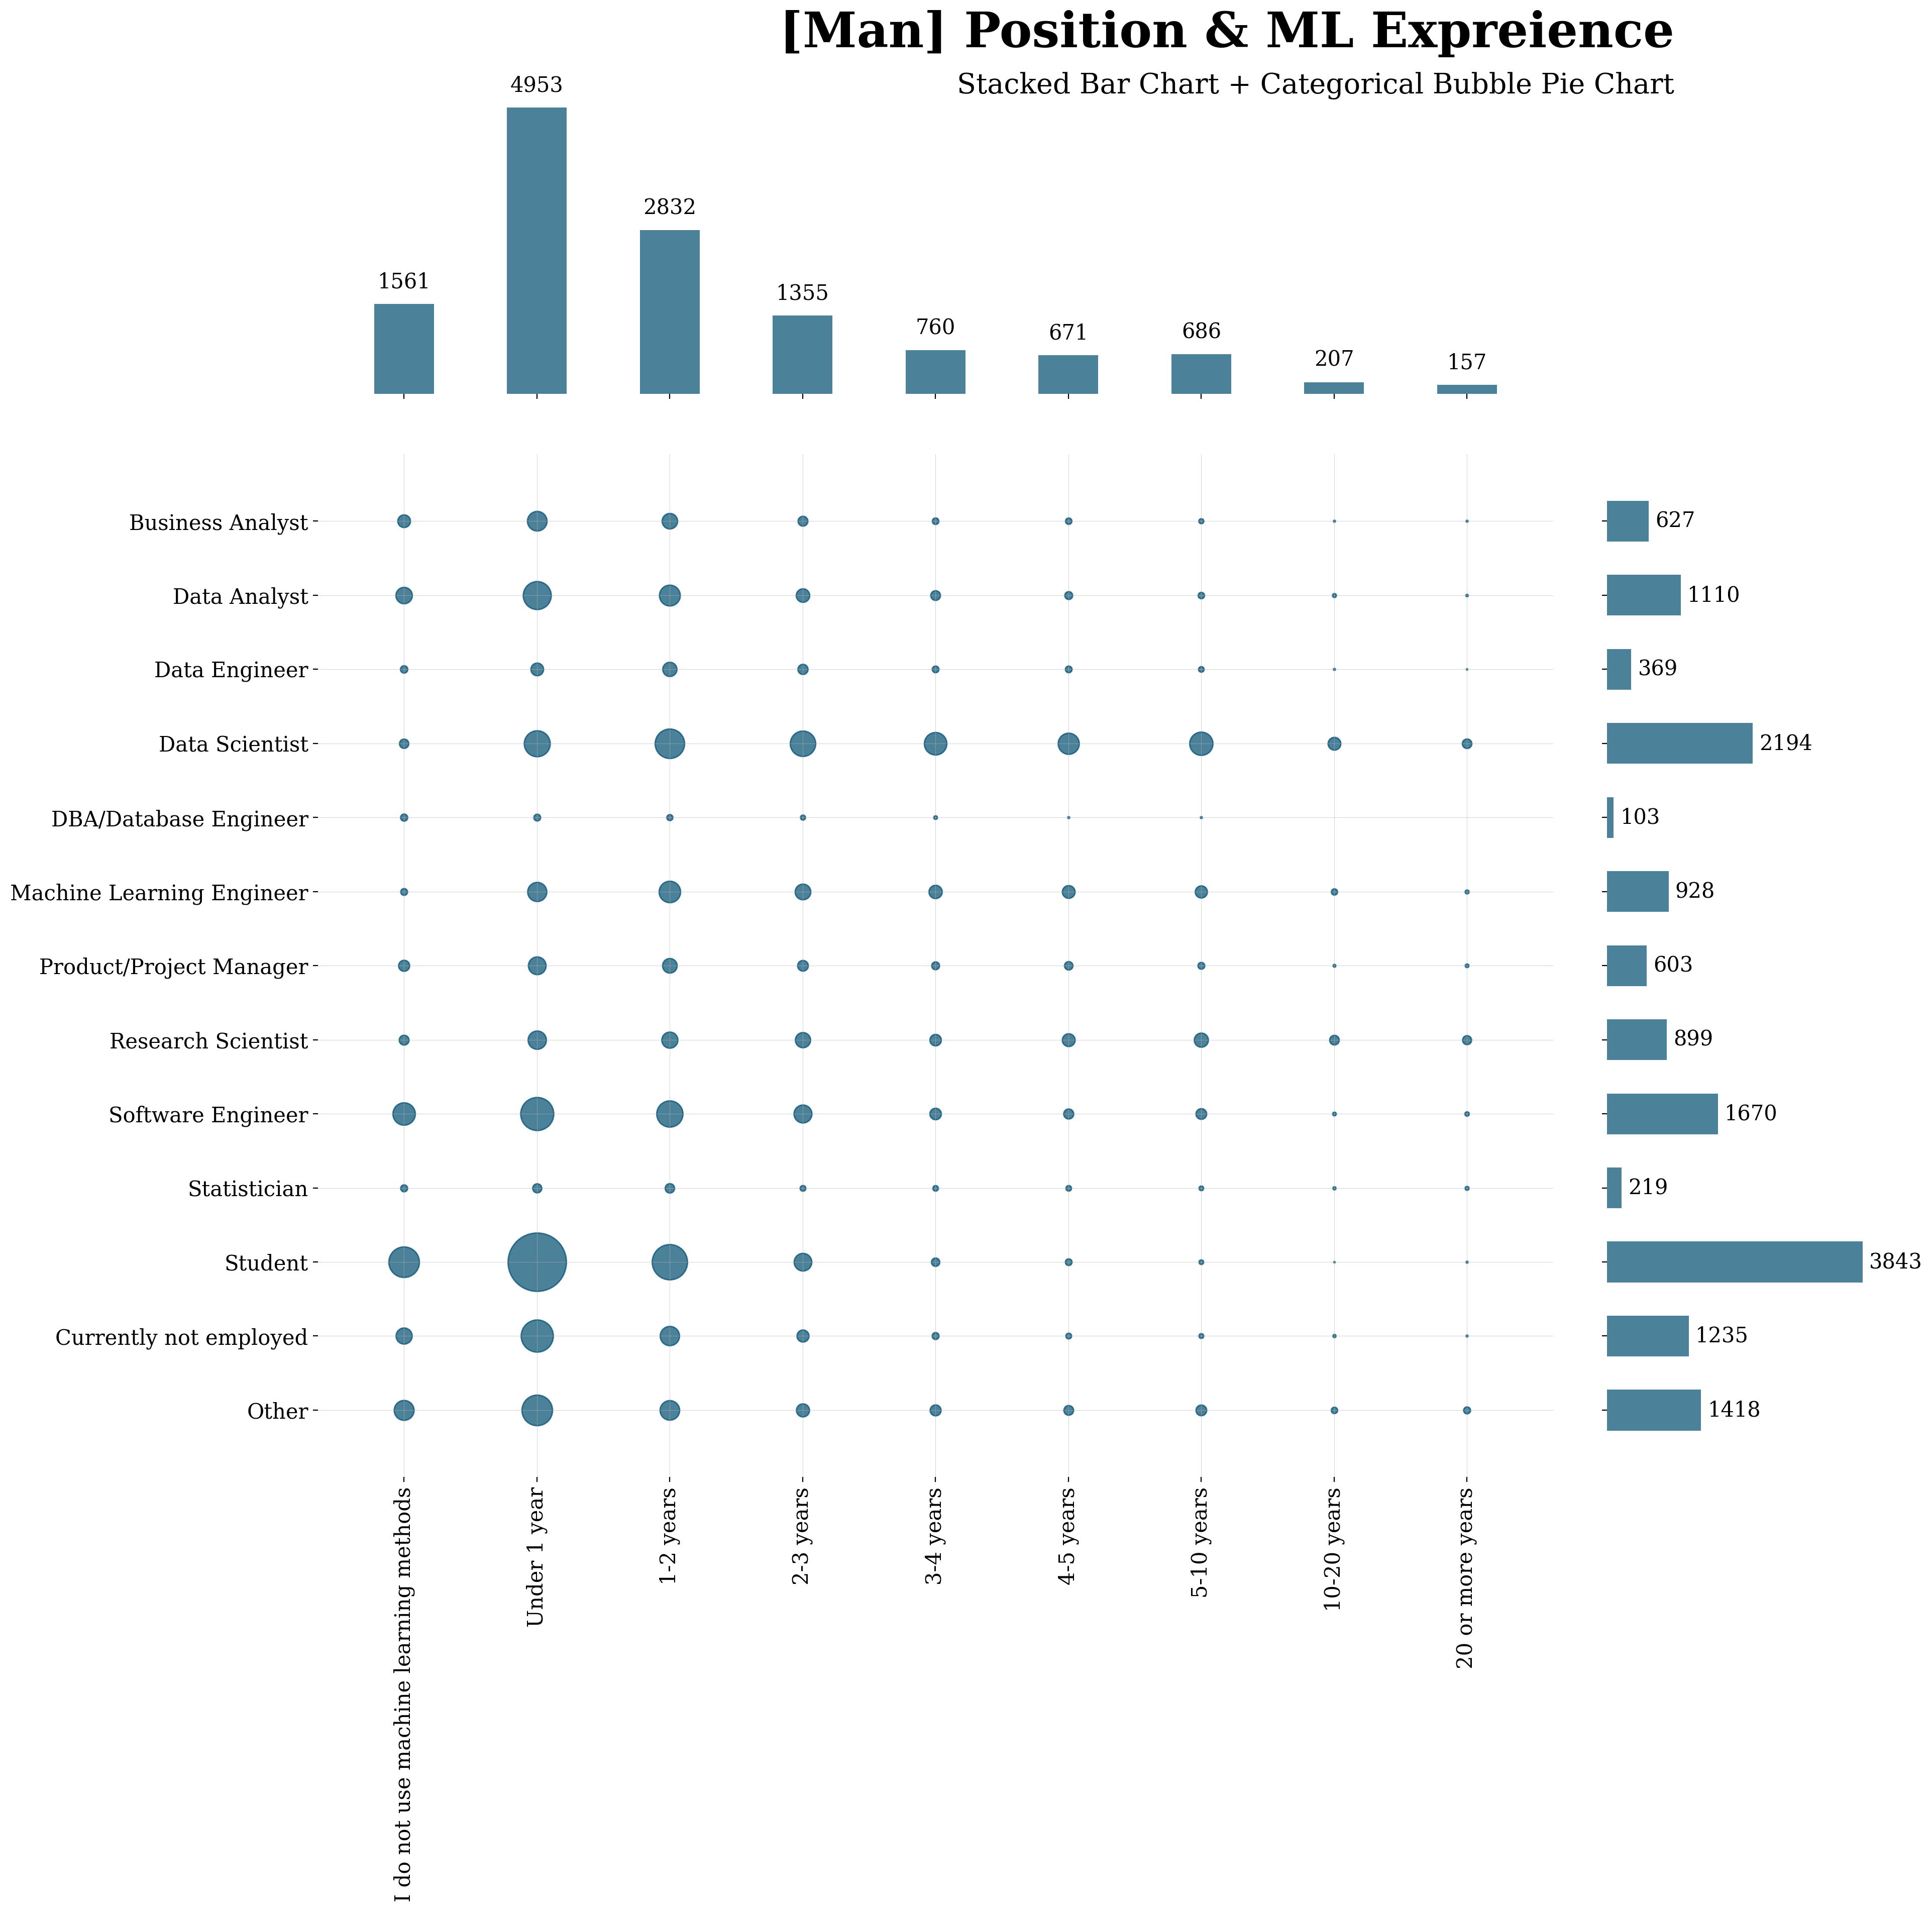

In [15]:
fig = plt.figure(figsize=(20, 23), dpi=200)
gs = fig.add_gridspec(5, 5)
ax_plot = fig.add_subplot(gs[1:4, 0:4])

for q5_index in q5_order:
    for q15_index in q15_order:
        man = q5q15_data_man[q5_index][q15_index]
        ax_plot.scatter(q15_index, q5_index, s=man, color='#004c70', alpha=0.7)
        
ax_pos = fig.add_subplot(gs[0, 0:4], sharex=ax_plot)
q15_man = data[data['Q2'] == 'Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(q15_man.index, q15_man, width=0.45, color='#004c70', alpha=0.7)

for i in q15_order:
    ax_pos.annotate(f'{q15_man[i]}', xy=(i, q15_man[i] + 200),
                    ha='center', va='bottom', fontfamily='serif', fontsize=15)
plt.setp(ax_pos.get_xticklabels(), visible=False)
ax_pos.set_yticks([])

ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot)
q5_man = data[data['Q2'] == 'Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(q5_man.index, q5_man, height=0.55,color='#004c70', alpha=0.7)

for i in q5_order:
    ax_exp.annotate(f'{q5_man[i]}', xy=(q5_man[i] + 100, i),
                    ha='left', va='center', fontfamily='serif', fontsize=15)
plt.setp(ax_exp.get_yticklabels(), visible=False)
ax_exp.set_xticks([])

for i in ['top', 'right', 'bottom', 'left']:
    ax_plot.spines[i].set_visible(False)
    ax_exp.spines[i].set_visible(False)
    ax_pos.spines[i].set_visible(False)
ax_plot.grid(linewidth=0.2, zorder=0)
ax_plot.set_xticklabels(q15_order, fontfamily='serif', rotation=90, fontsize=15)
ax_plot.set_yticklabels(q5_order, fontfamily='serif', fontsize=15)
fig.text(0.8, 0.9, '[Man] Position & ML Expreience', fontweight='bold',
         fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart',
         fontweight='light', fontfamily='serif', fontsize=20, ha='right')
plt.show()

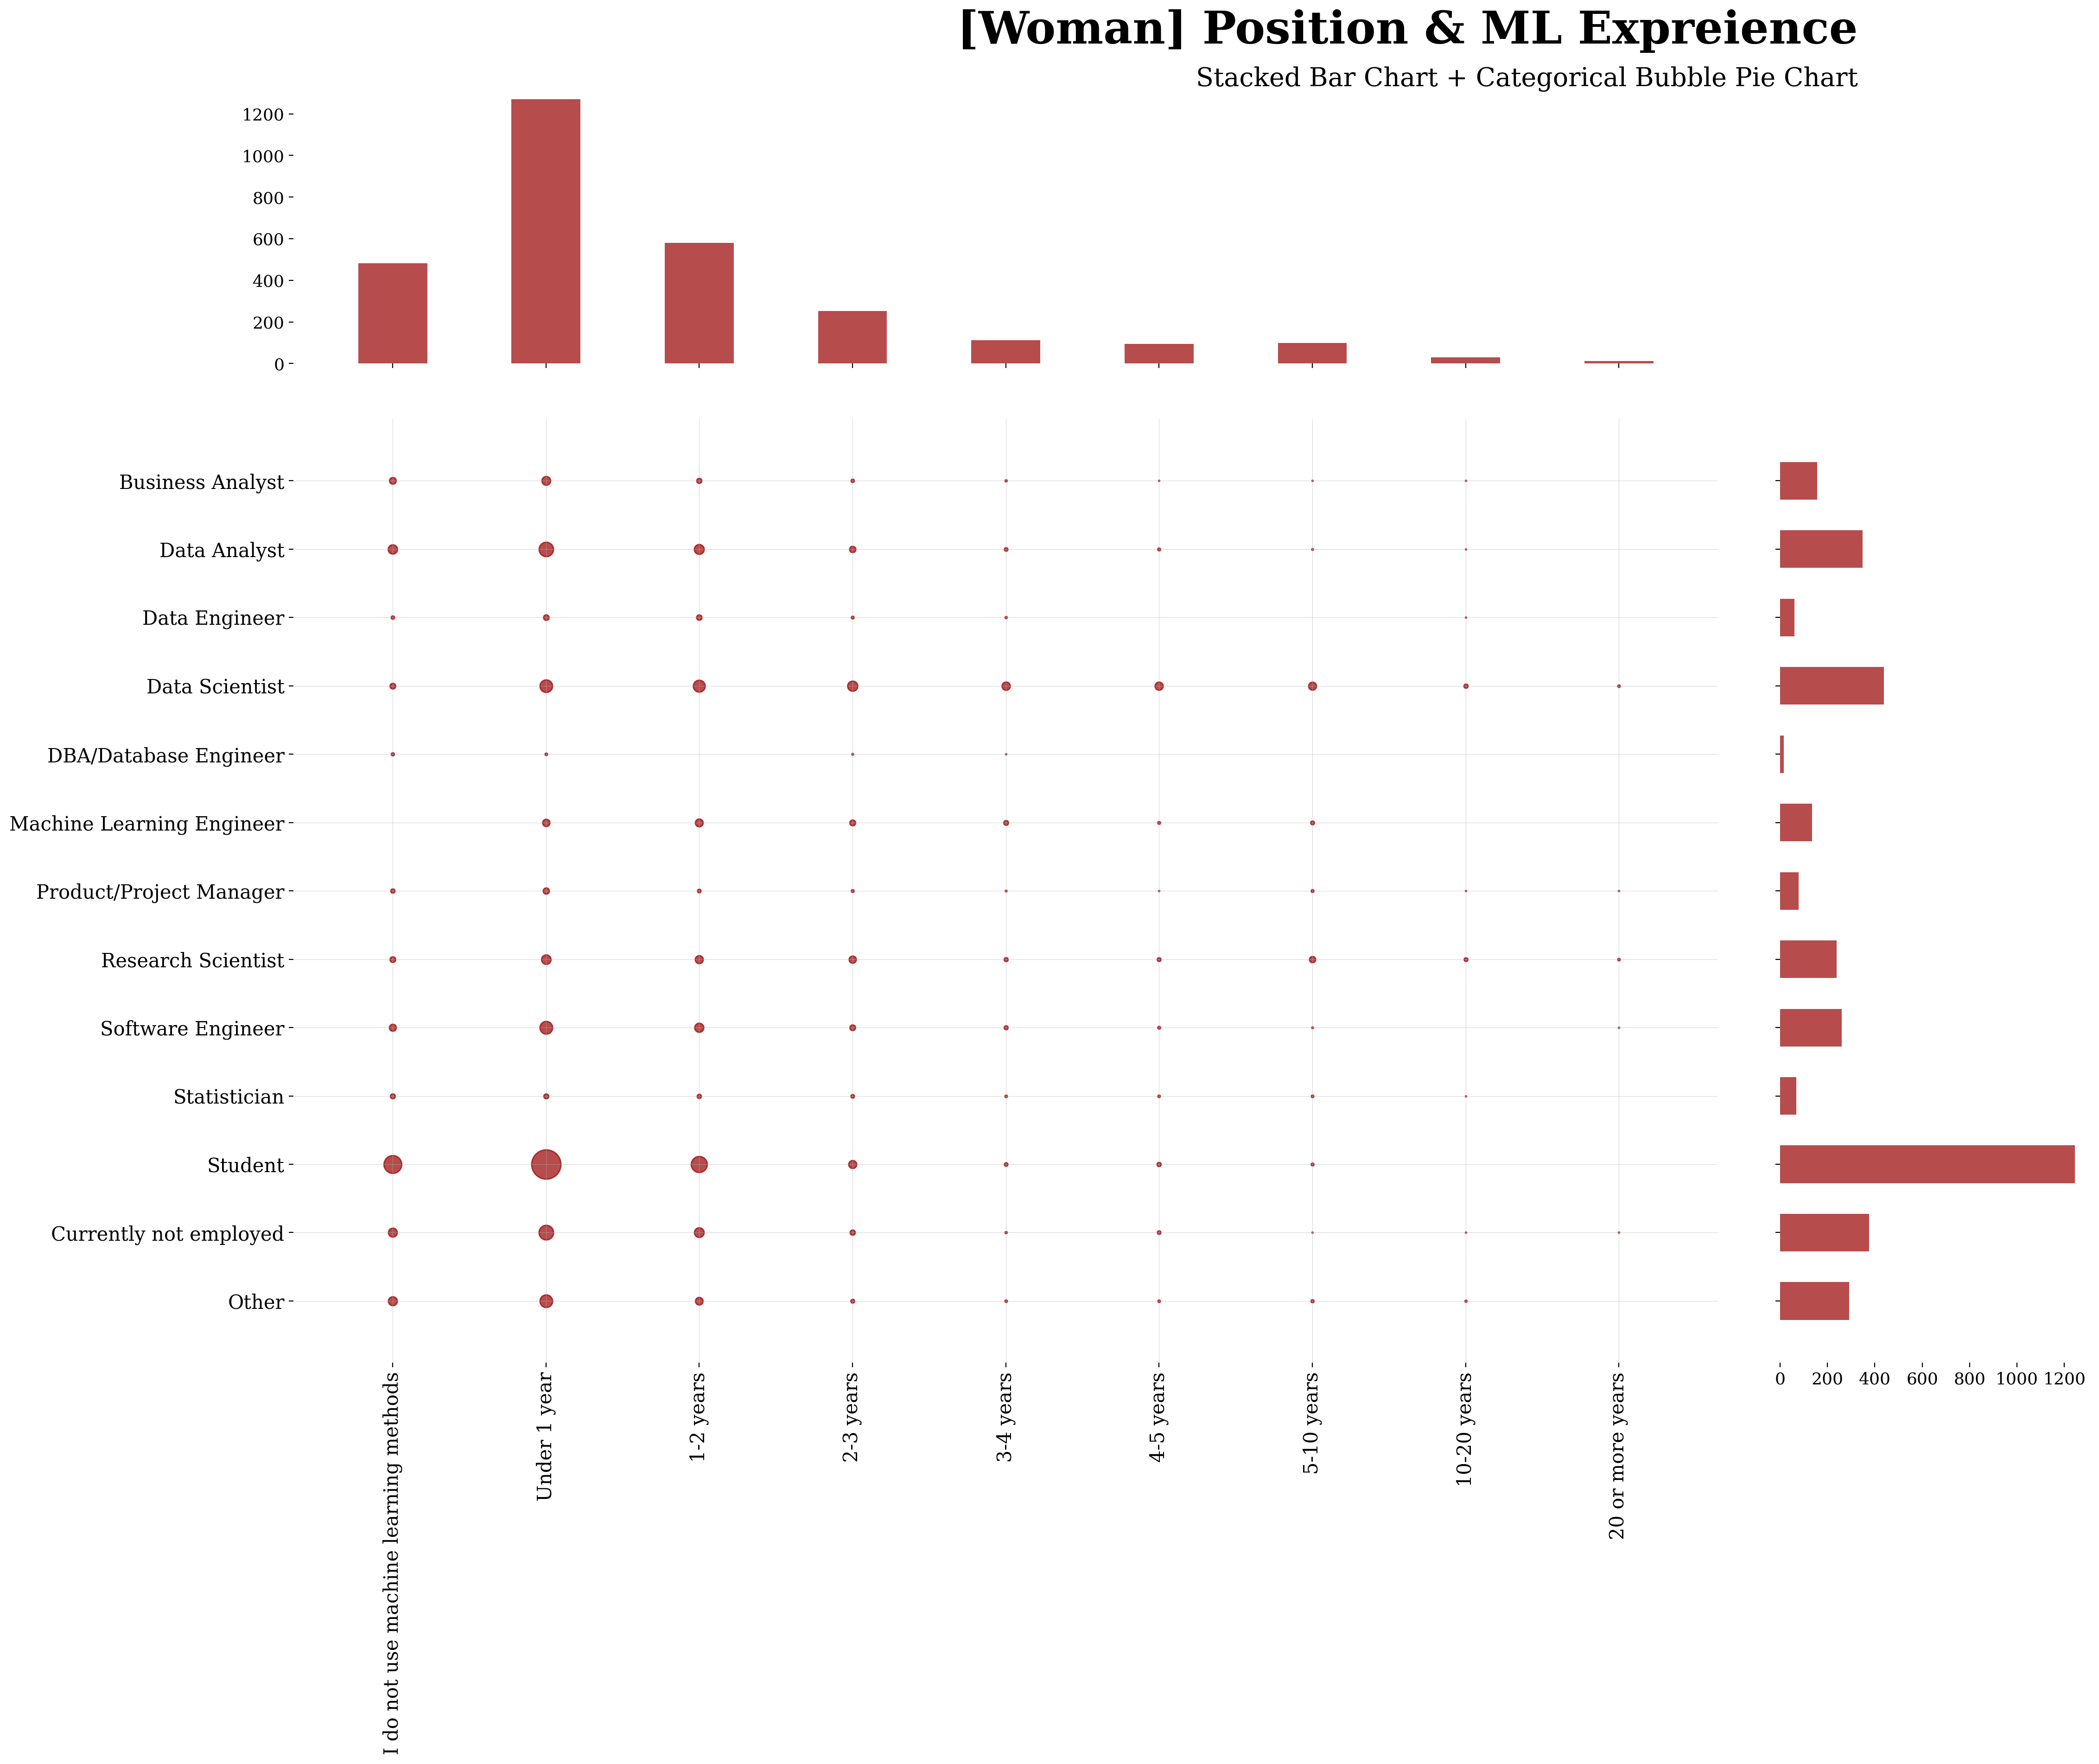

In [28]:
fig = plt.figure(figsize=(25, 23), dpi=200)
gs = fig.add_gridspec(5, 5)
ax_plot = fig.add_subplot(gs[1:4, 0:4])

for q5_index in q5_order:
    for q15_index in q15_order:
        woman = q5q15_data_woman[q5_index][q15_index]
        ax_plot.scatter(q15_index, q5_index, s=woman, color='#990000', alpha=0.7)
        
ax_pos = fig.add_subplot(gs[0, 0:4], sharex=ax_plot)
q15_woman = data[data['Q2'] == 'Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(q15_woman.index, q15_woman, width=0.45, color='#990000', alpha=0.7)
plt.setp(ax_pos.get_xticklabels(), visible=False)
ax_pos.set_yticklabels(np.arange(0, 1201, 200), fontsize=13, fontfamily='serif')

ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot)
q5_woman = data[data['Q2'] == 'Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(q5_woman.index, q5_woman, height=0.55,color='#990000', alpha=0.7)
plt.setp(ax_exp.get_yticklabels(), visible=False)
ax_exp.set_xticklabels(np.arange(0, 1201, 200), fontsize=13, fontfamily='serif')

for i in ['top', 'right', 'bottom', 'left']:
    ax_plot.spines[i].set_visible(False)
    ax_exp.spines[i].set_visible(False)
    ax_pos.spines[i].set_visible(False)
ax_plot.grid(linewidth=0.2, zorder=0)
ax_plot.set_xticklabels(q15_order, fontfamily='serif', rotation=90, fontsize=15)
ax_plot.set_yticklabels(q5_order, fontfamily='serif', fontsize=15)
fig.text(0.8, 0.9, '[Woman] Position & ML Expreience', fontweight='bold',
         fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart',
         fontweight='light', fontfamily='serif', fontsize=20, ha='right')
plt.show()

In [31]:
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499',
             '7,500-9,999','10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999',
             '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999',
             '80,000-89,999', '90,000-99,999','100,000-124,999', '125,000-149,999',  '150,000-199,999',
             '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']

q24_data = data['Q24'].value_counts()[q24_order]

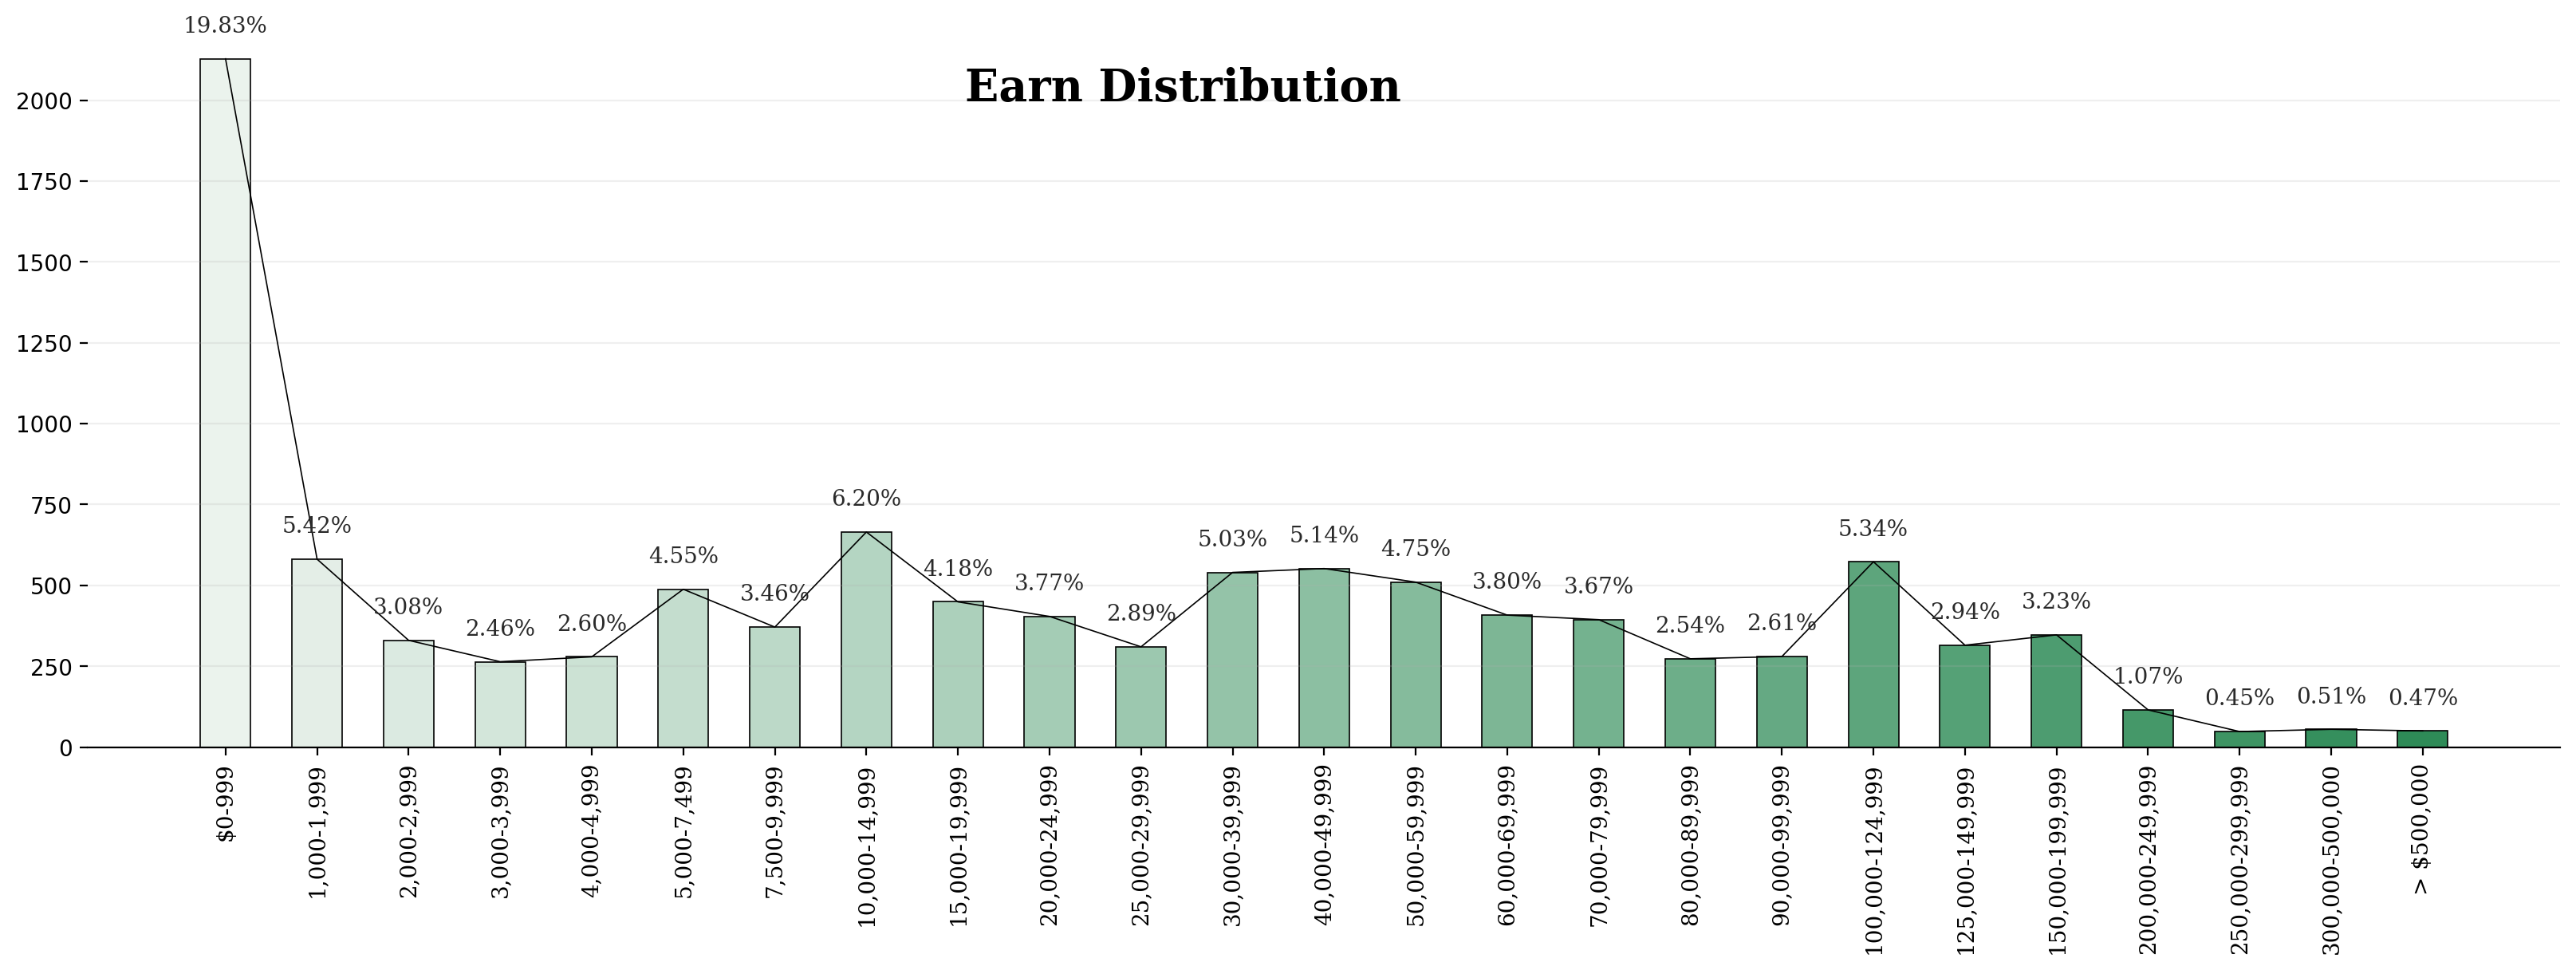

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=200)
ax.bar(q24_data.index, q24_data, edgecolor='black', width=0.55,
       color=sns.light_palette('seagreen', len(q24_data)), linewidth=0.6)
ax.plot(q24_data.index, q24_data, linewidth=0.6, c='k')
for i in q24_data.index:
    ax.annotate(f'{q24_data[i] / q24_data.sum() * 100:.2f}%', xy=(i, q24_data[i] + 100),
               ha='center', va='center', color='#2a2a2a', fontfamily='serif',
               fontweight='light')
    
for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)
ax.set_xticklabels(q24_data.index, rotation=90, family='serif')
ax.grid(axis='y', linestyle='-', alpha=0.2)
fig.text(0.4, 0.8, 'Earn Distribution', family='serif', weight='bold', size=20)
plt.show()

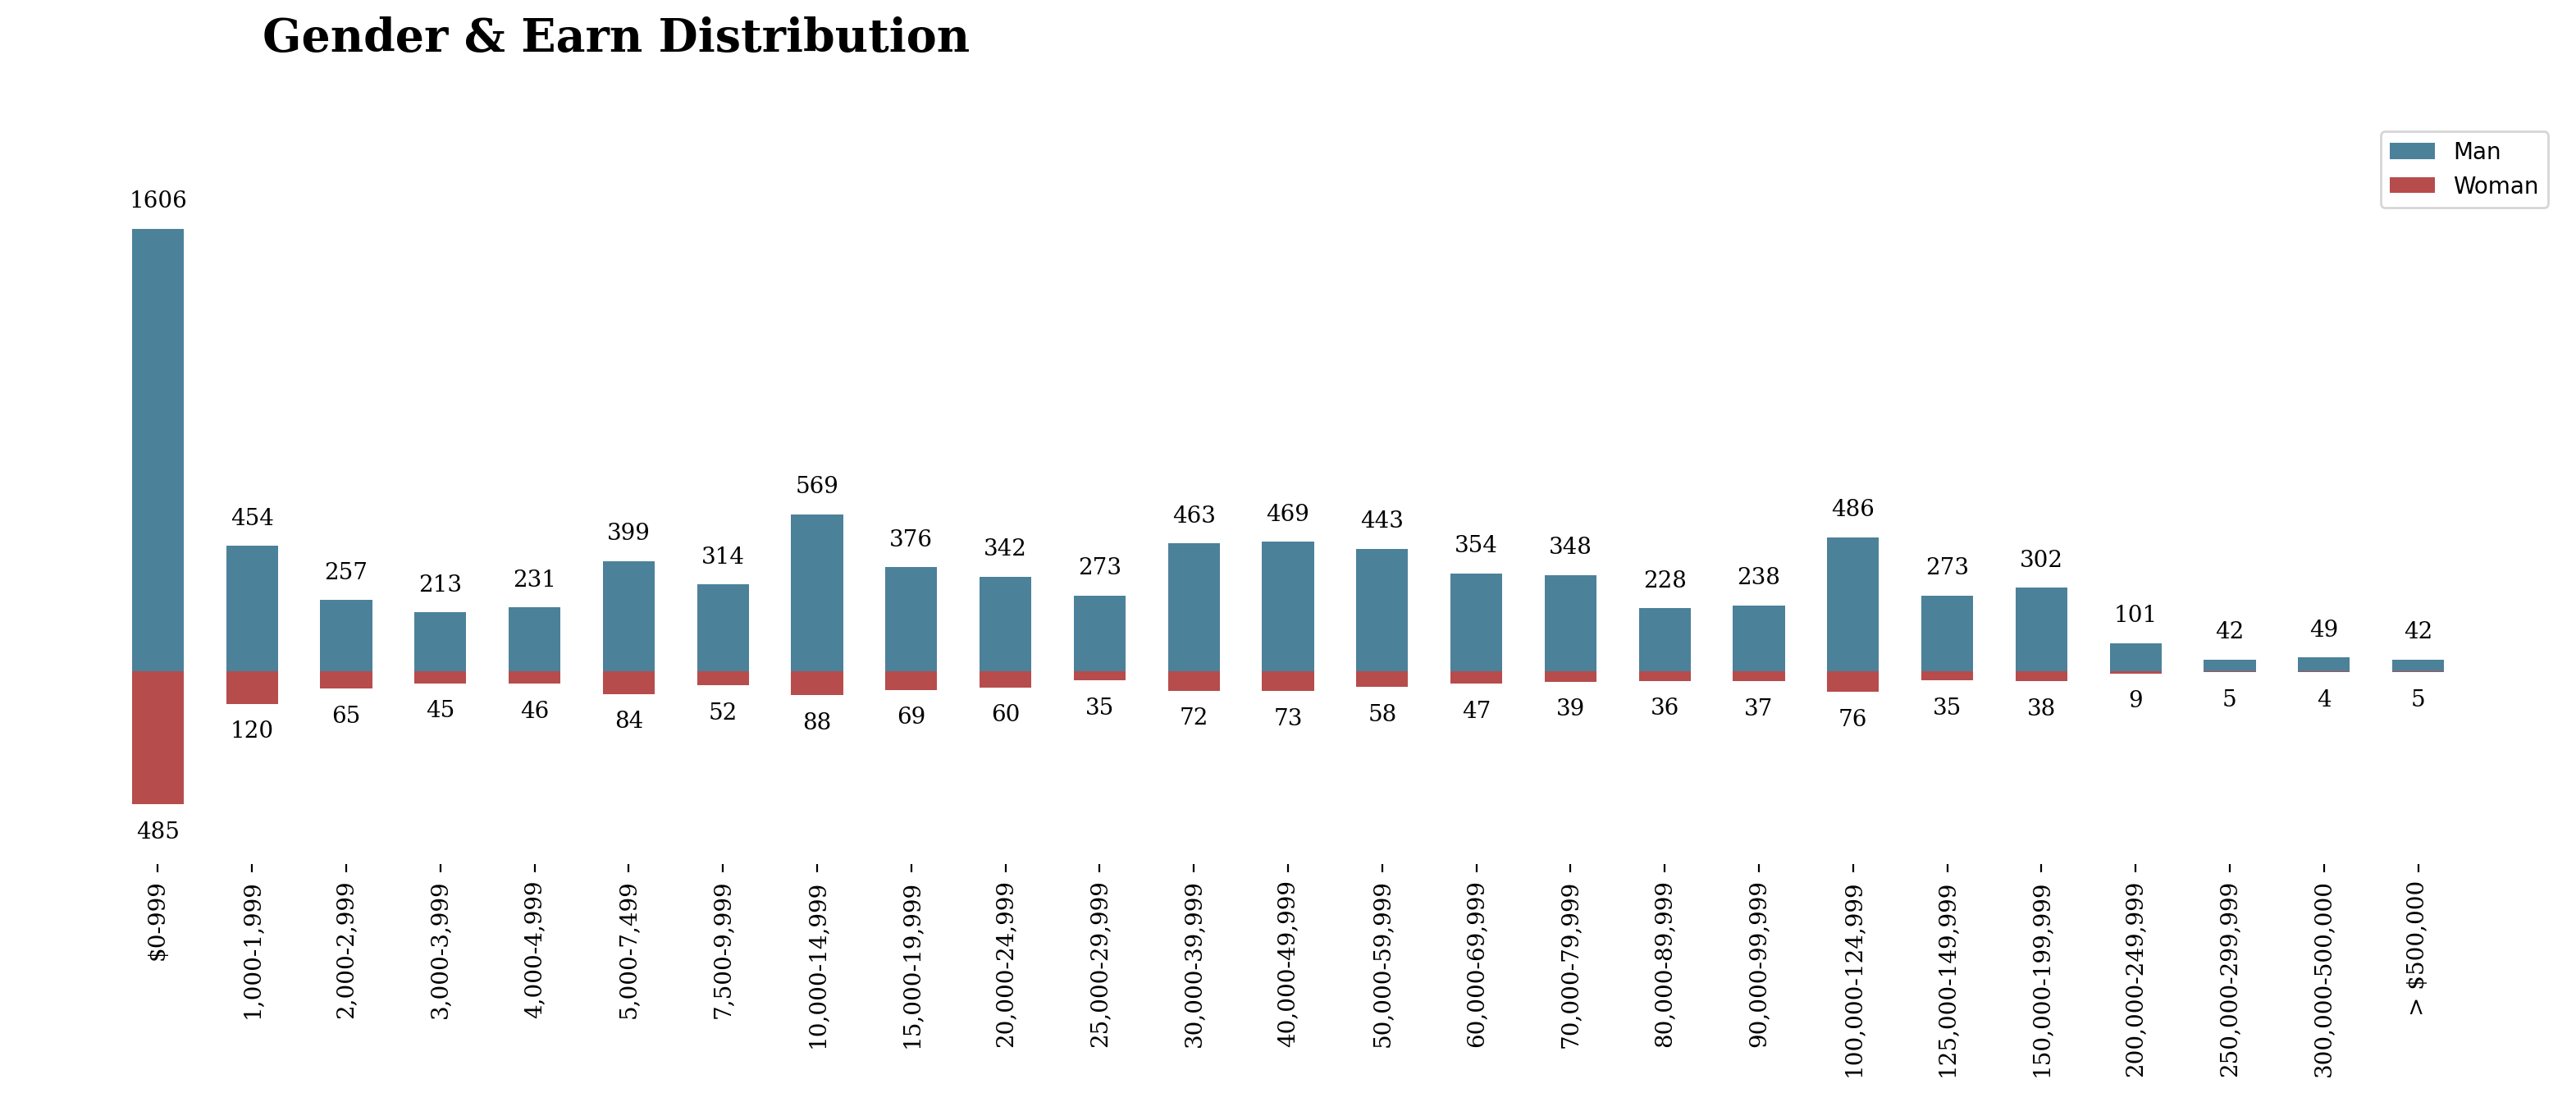

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=200)
q24_data_man = data[data['Q2'] == 'Man']['Q24'].value_counts()[q24_order]
ax.bar(q24_data_man.index, q24_data_man, width=0.55, color='#004c70', alpha=0.7, label='Man')

q24_data_woman = data[data['Q2'] == 'Woman']['Q24'].value_counts()[q24_order]
ax.bar(q24_data_woman.index, -q24_data_woman, width=0.55, color='#990000', alpha=0.7, label='Woman')

for i in q24_data_man.index:
    ax.annotate(f'{q24_data_man[i]}', xy=(i, q24_data_man[i] + 100), family='serif', 
               ha='center', va='center')
    ax.annotate(f'{q24_data_woman[i]}', xy=(i, -q24_data_woman[i] - 100), family='serif',
               ha='center', va='center')

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_visible(False)
ax.set_ylim(-700, 2000)
ax.set_yticks([])
ax.set_xticklabels(q24_data_woman.index, family='serif', rotation=90)
plt.legend(fontsize='medium')
fig.text(0.2, 0.95, 'Gender & Earn Distribution', family='serif', size=20, weight='bold')
plt.show()

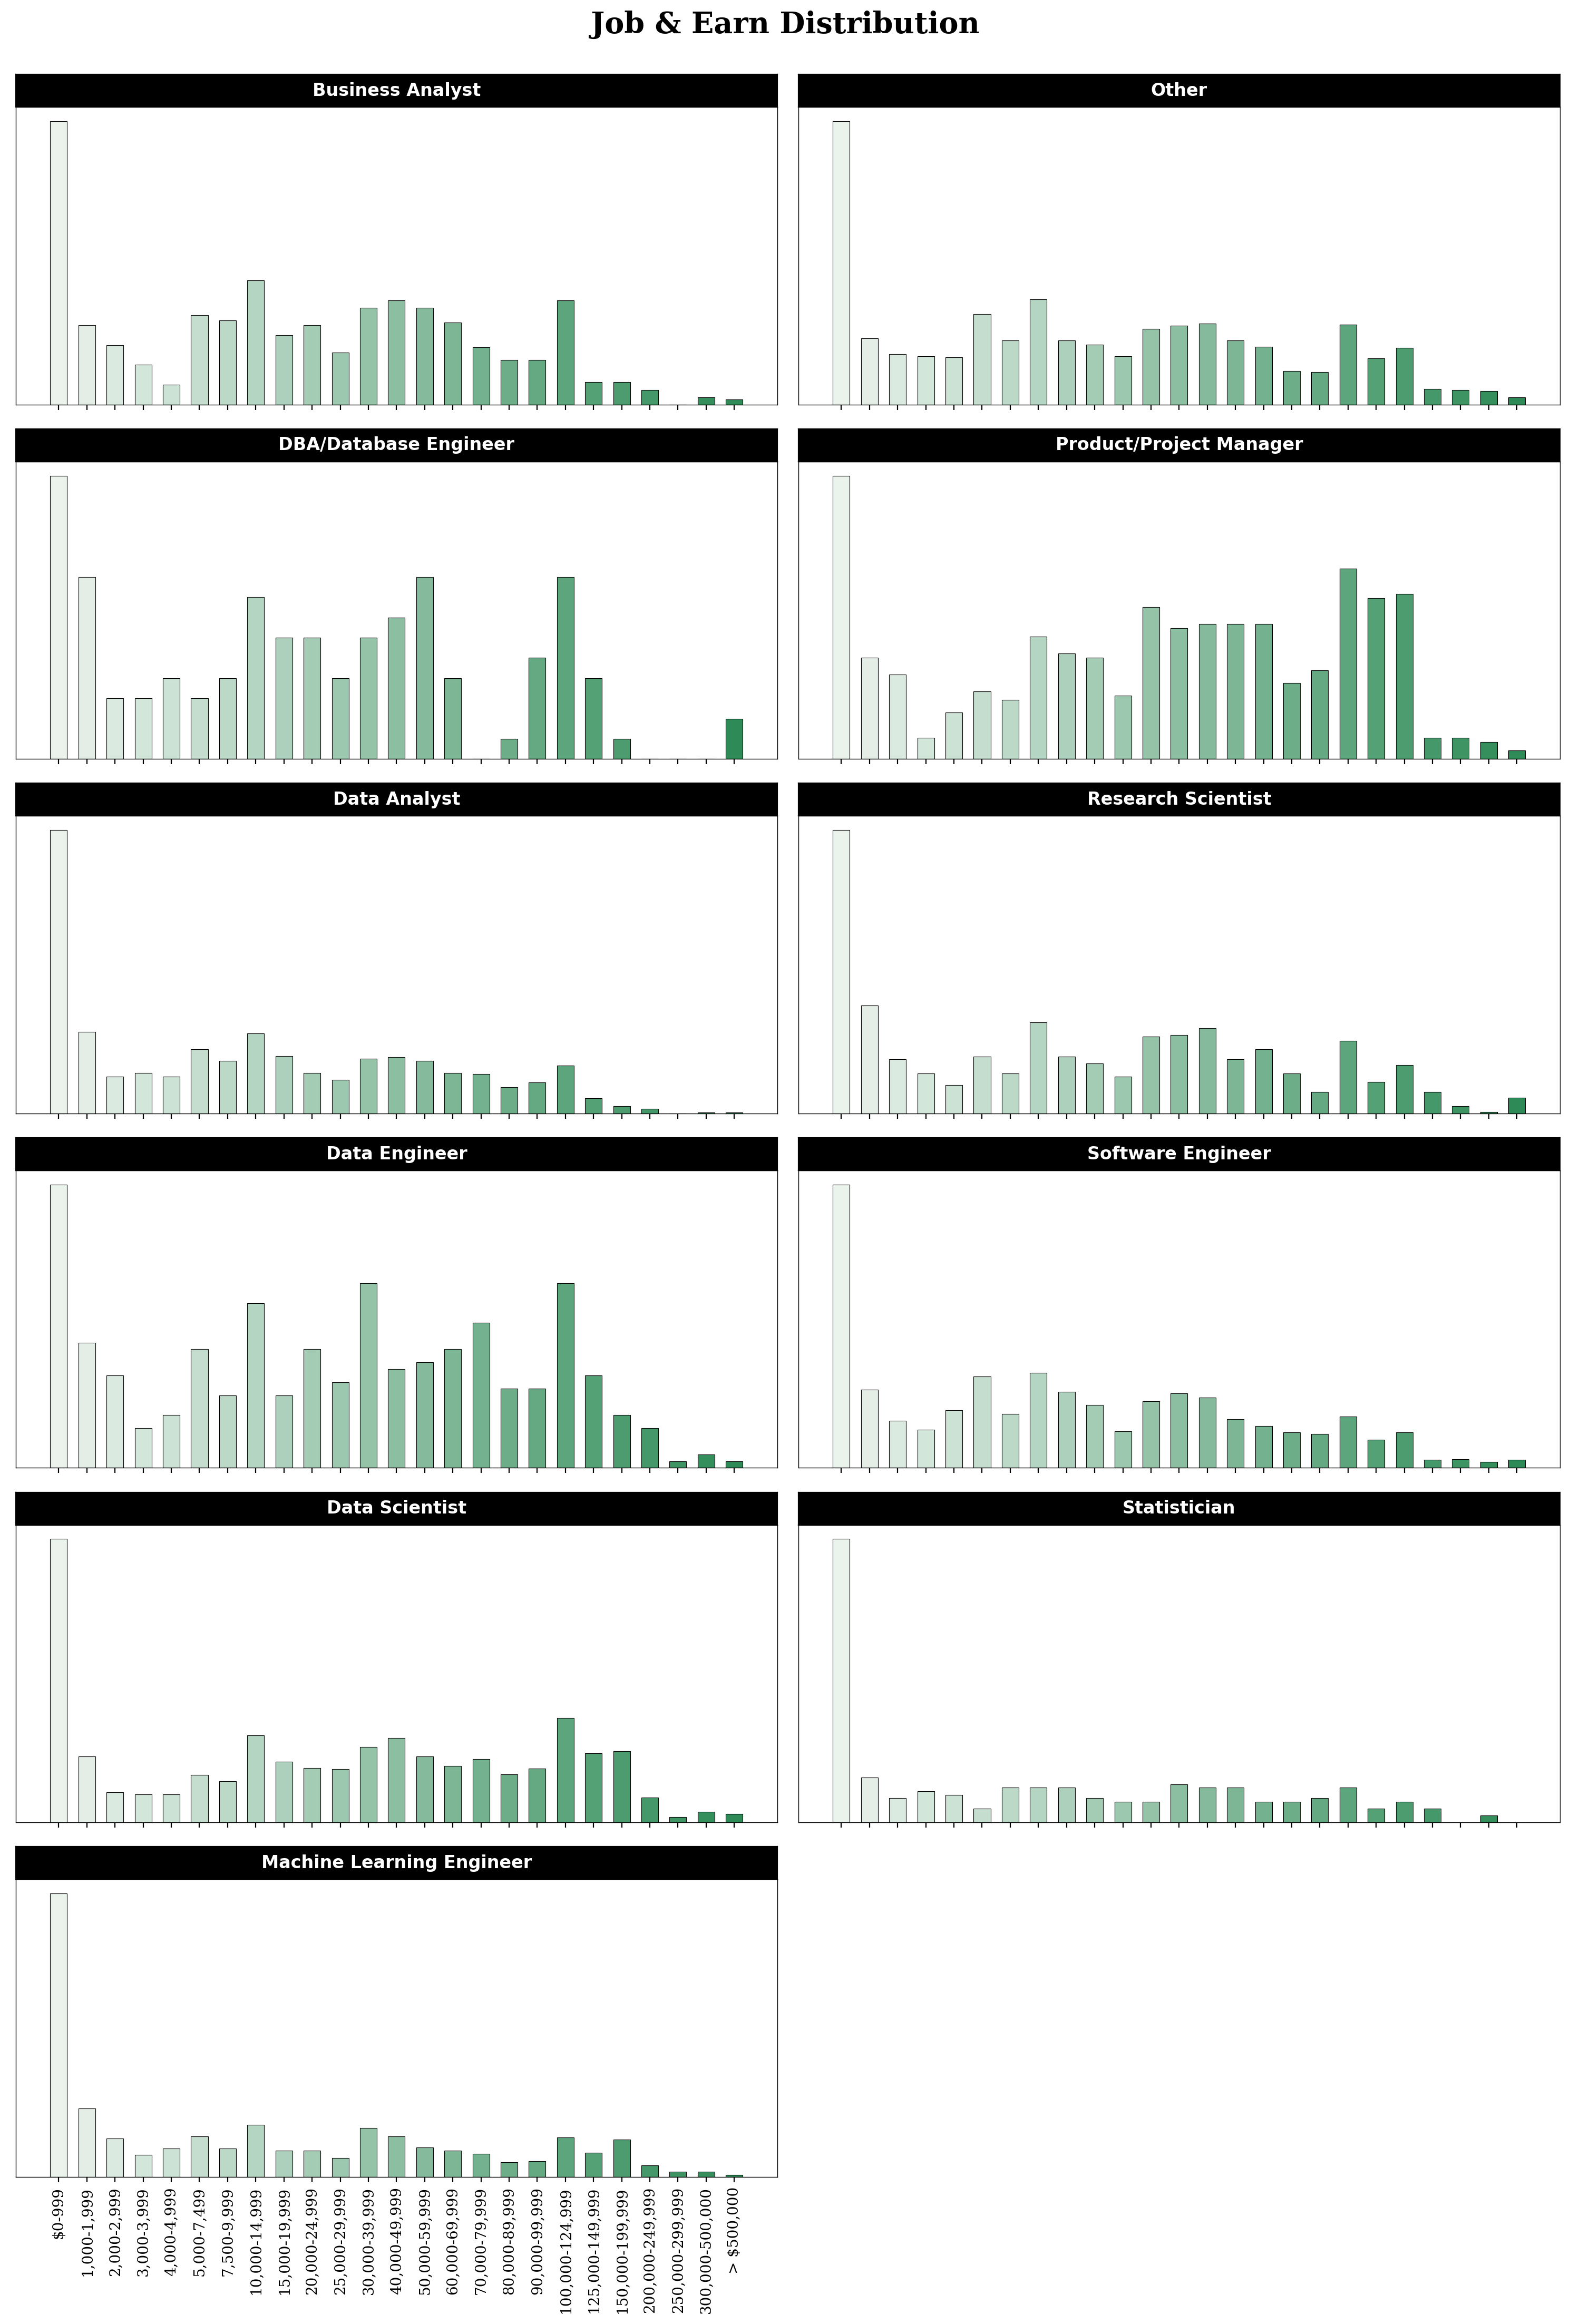

In [135]:
q5q24_data = pd.pivot_table(data, values='count', index='Q5', columns='Q24',
                            aggfunc=np.sum).fillna(0).astype('int').loc[:, q24_order]
q5q24_data = (q5q24_data.T / q5q24_data.sum(axis=1))

colors = sns.light_palette('seagreen', len(q24_data))
fig, ax = plt.subplots(6, 2, figsize=(15, 22), sharex=True)

for i, index in enumerate(q5q24_data.columns):
    ax[i % 6][i // 6].bar(q5q24_data[index].index, q5q24_data[index], color=colors, 
                         edgecolor='black', width=0.6, linewidth=0.4)
    ax[i % 6][i // 6].set_yticks([])
    for j in ['top', 'bottom', 'right', 'left']:
        ax[i % 6][i // 6].spines[j].set_linewidth(0.5)
        
    divider = make_axes_locatable(ax[i % 6][i // 6])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')
    
    at = AnchoredText(index, loc=10, prop=dict(backgroundcolor='black',
                                               weight='bold', size=12, color='white'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q5q24_data.index, rotation=90, family='serif')
ax[-1][1].set_visible(False)
fig.suptitle('Job & Earn Distribution', weight='bold', family='serif', size=20, y=1)
plt.tight_layout()
plt.show()

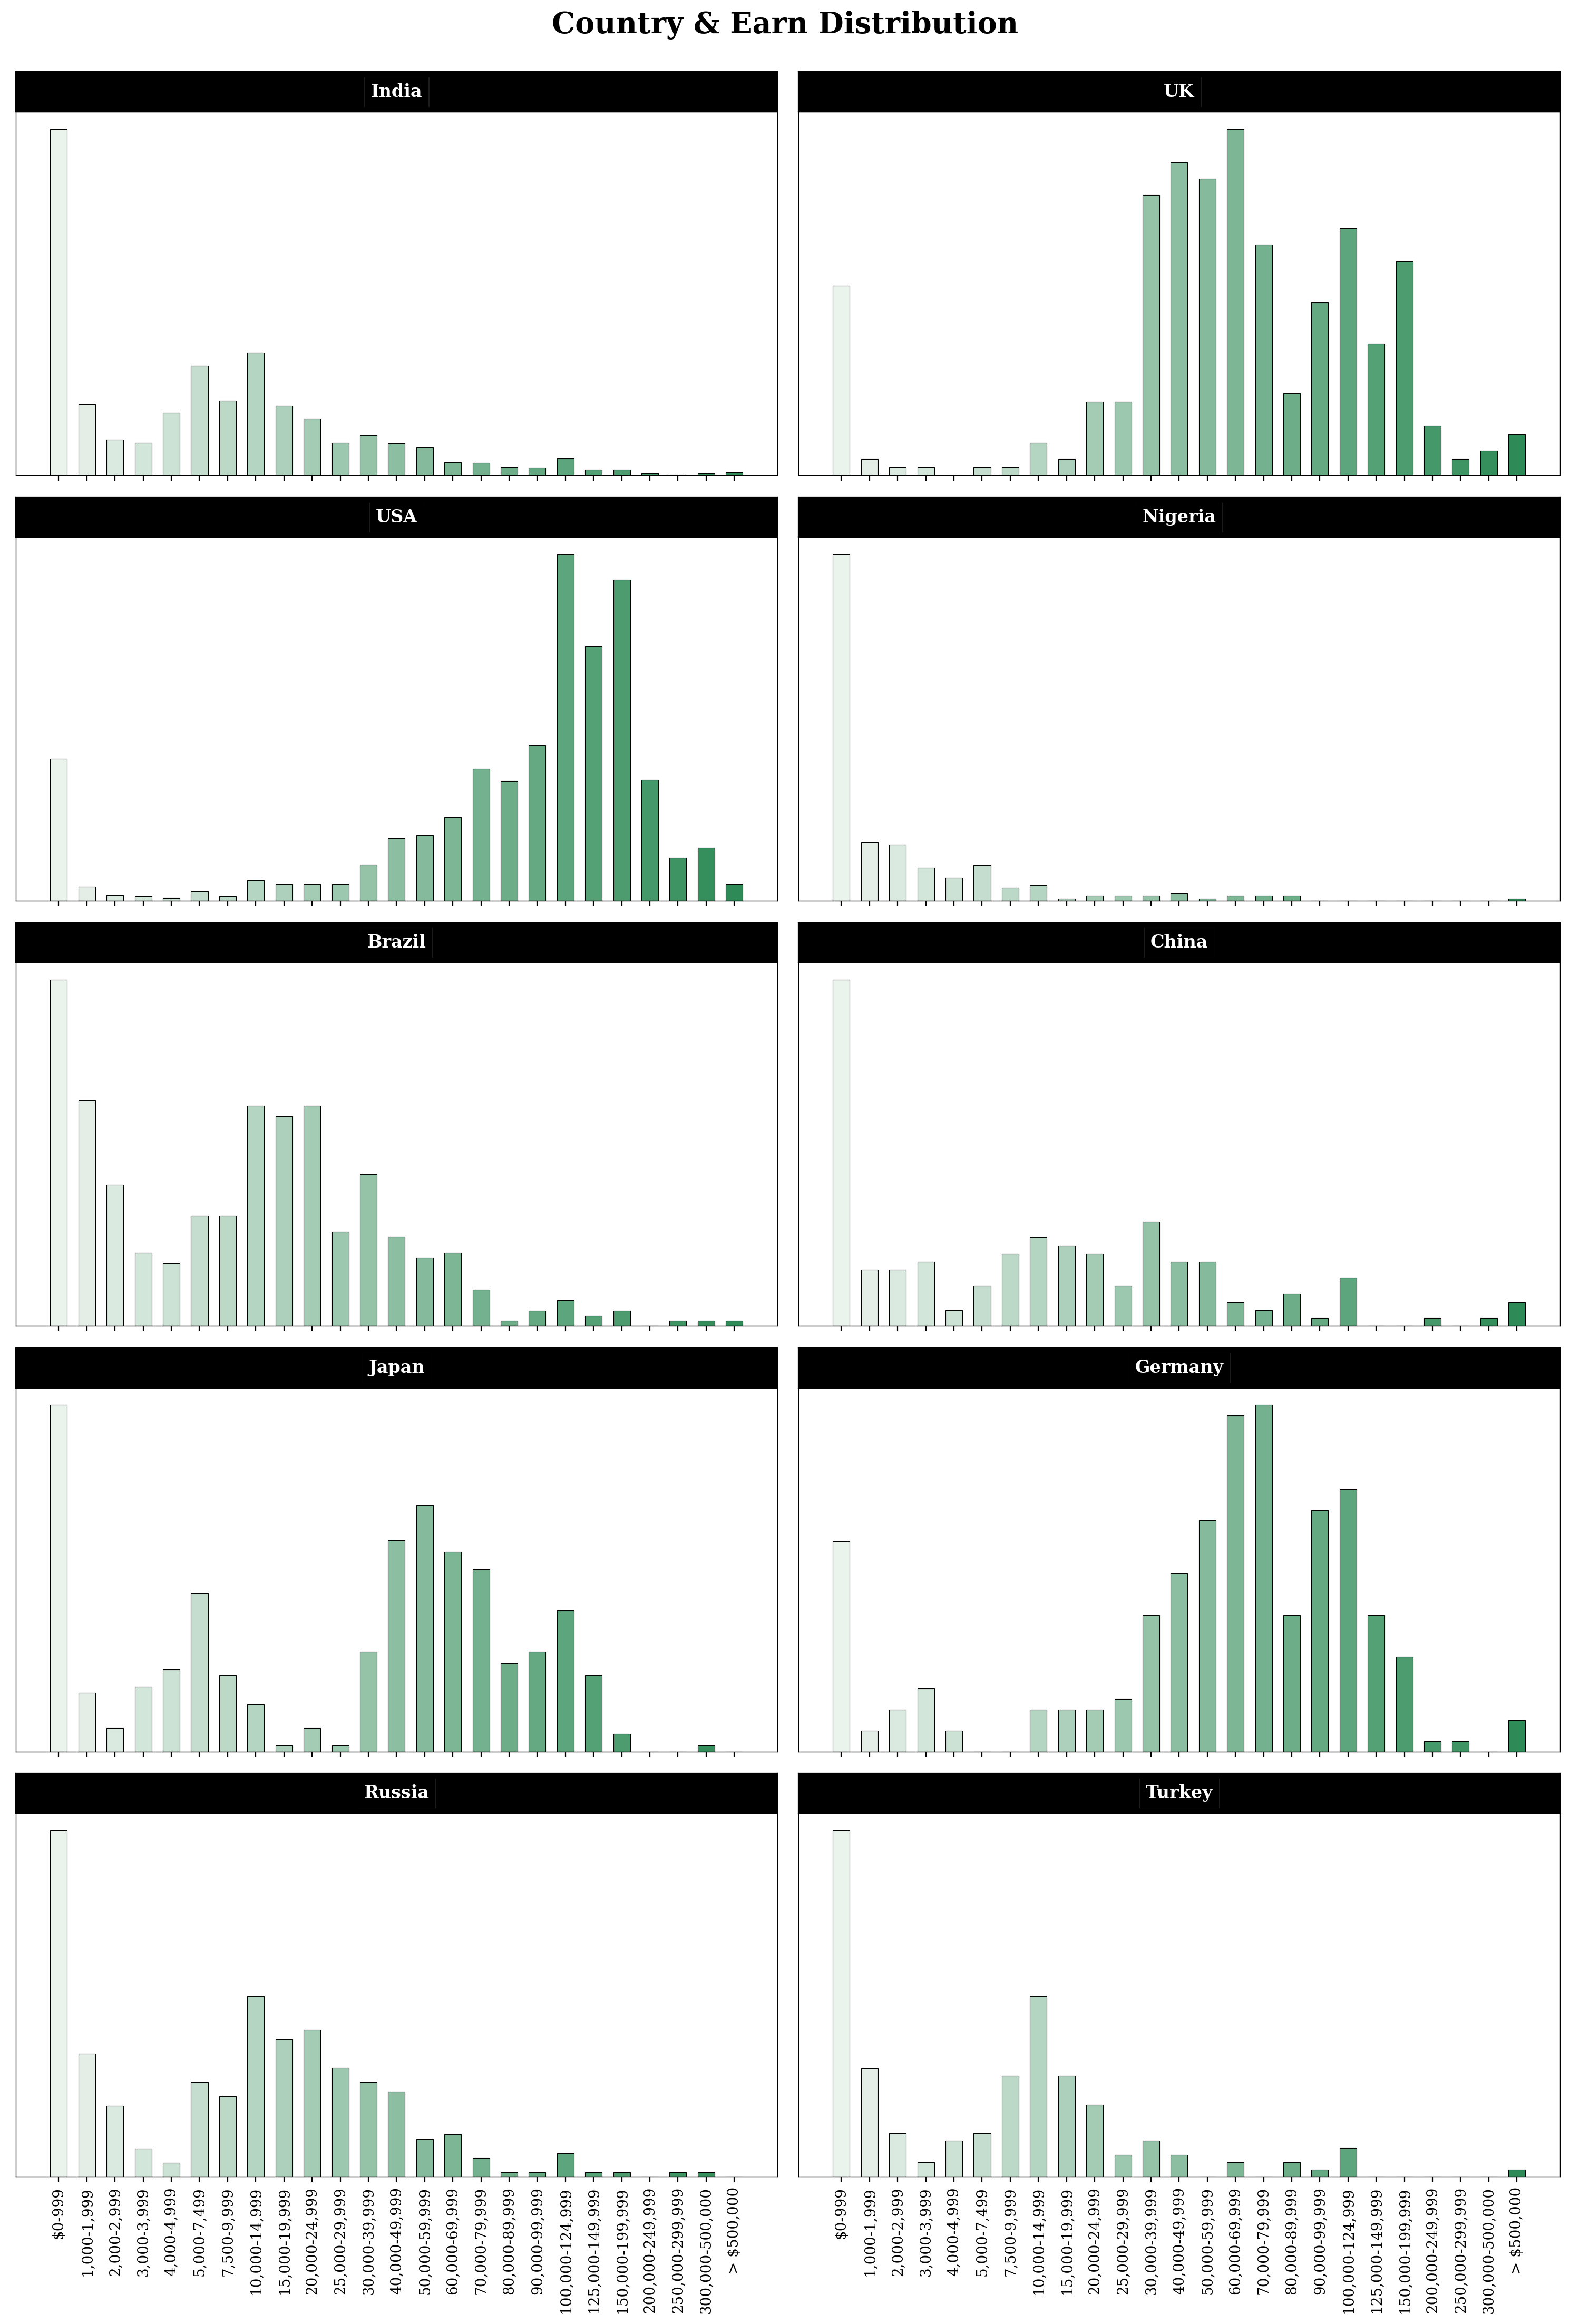

In [191]:
q3q24_data = pd.pivot_table(data, values='count', index=['Q3'], columns=['Q24'],
                            aggfunc=np.sum).fillna(0).astype('int').loc[q3_order, q24_order]
q3q24_data.rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'}, 
                 inplace=True)
q3q24_data = q3q24_data.T / q3q24_data.sum(axis=1) 

fig, ax = plt.subplots(5, 2, figsize=(15, 22), sharex=True)
colors = sns.light_palette('seagreen', len(q24_order))

for i, index in enumerate(q3q24_data.columns):
    ax[i % 5][i // 5].bar(q3q24_data[index].index, q3q24_data[index], color=colors,
                         edgecolor='black', linewidth=0.4, width=0.6)
    ax[i % 5][i // 5].set_yticks([])
    for j in ['top', 'bottom', 'left', 'right']:
        ax[i % 5][i // 5].spines[j].set_linewidth(0.5)
        
    divider = make_axes_locatable(ax[i % 5][i // 5])
    cax = divider.append_axes('top', size='11%', pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')
    
    at = AnchoredText(index, loc=10, prop=dict(size=12, family='serif', weight='bold', 
                                              backgroundcolor='black', color='white'))
    cax.add_artist(at)
fig.suptitle('Country & Earn Distribution', weight='bold', size=20, family='serif', y=1)
ax[-1][0].set_xticklabels(q24_order, rotation=90, family='serif')
ax[-1][-1].set_xticklabels(q24_order, rotation=90, family='serif')
plt.tight_layout()
plt.show()

##### pd.DataFrame.cumsum()

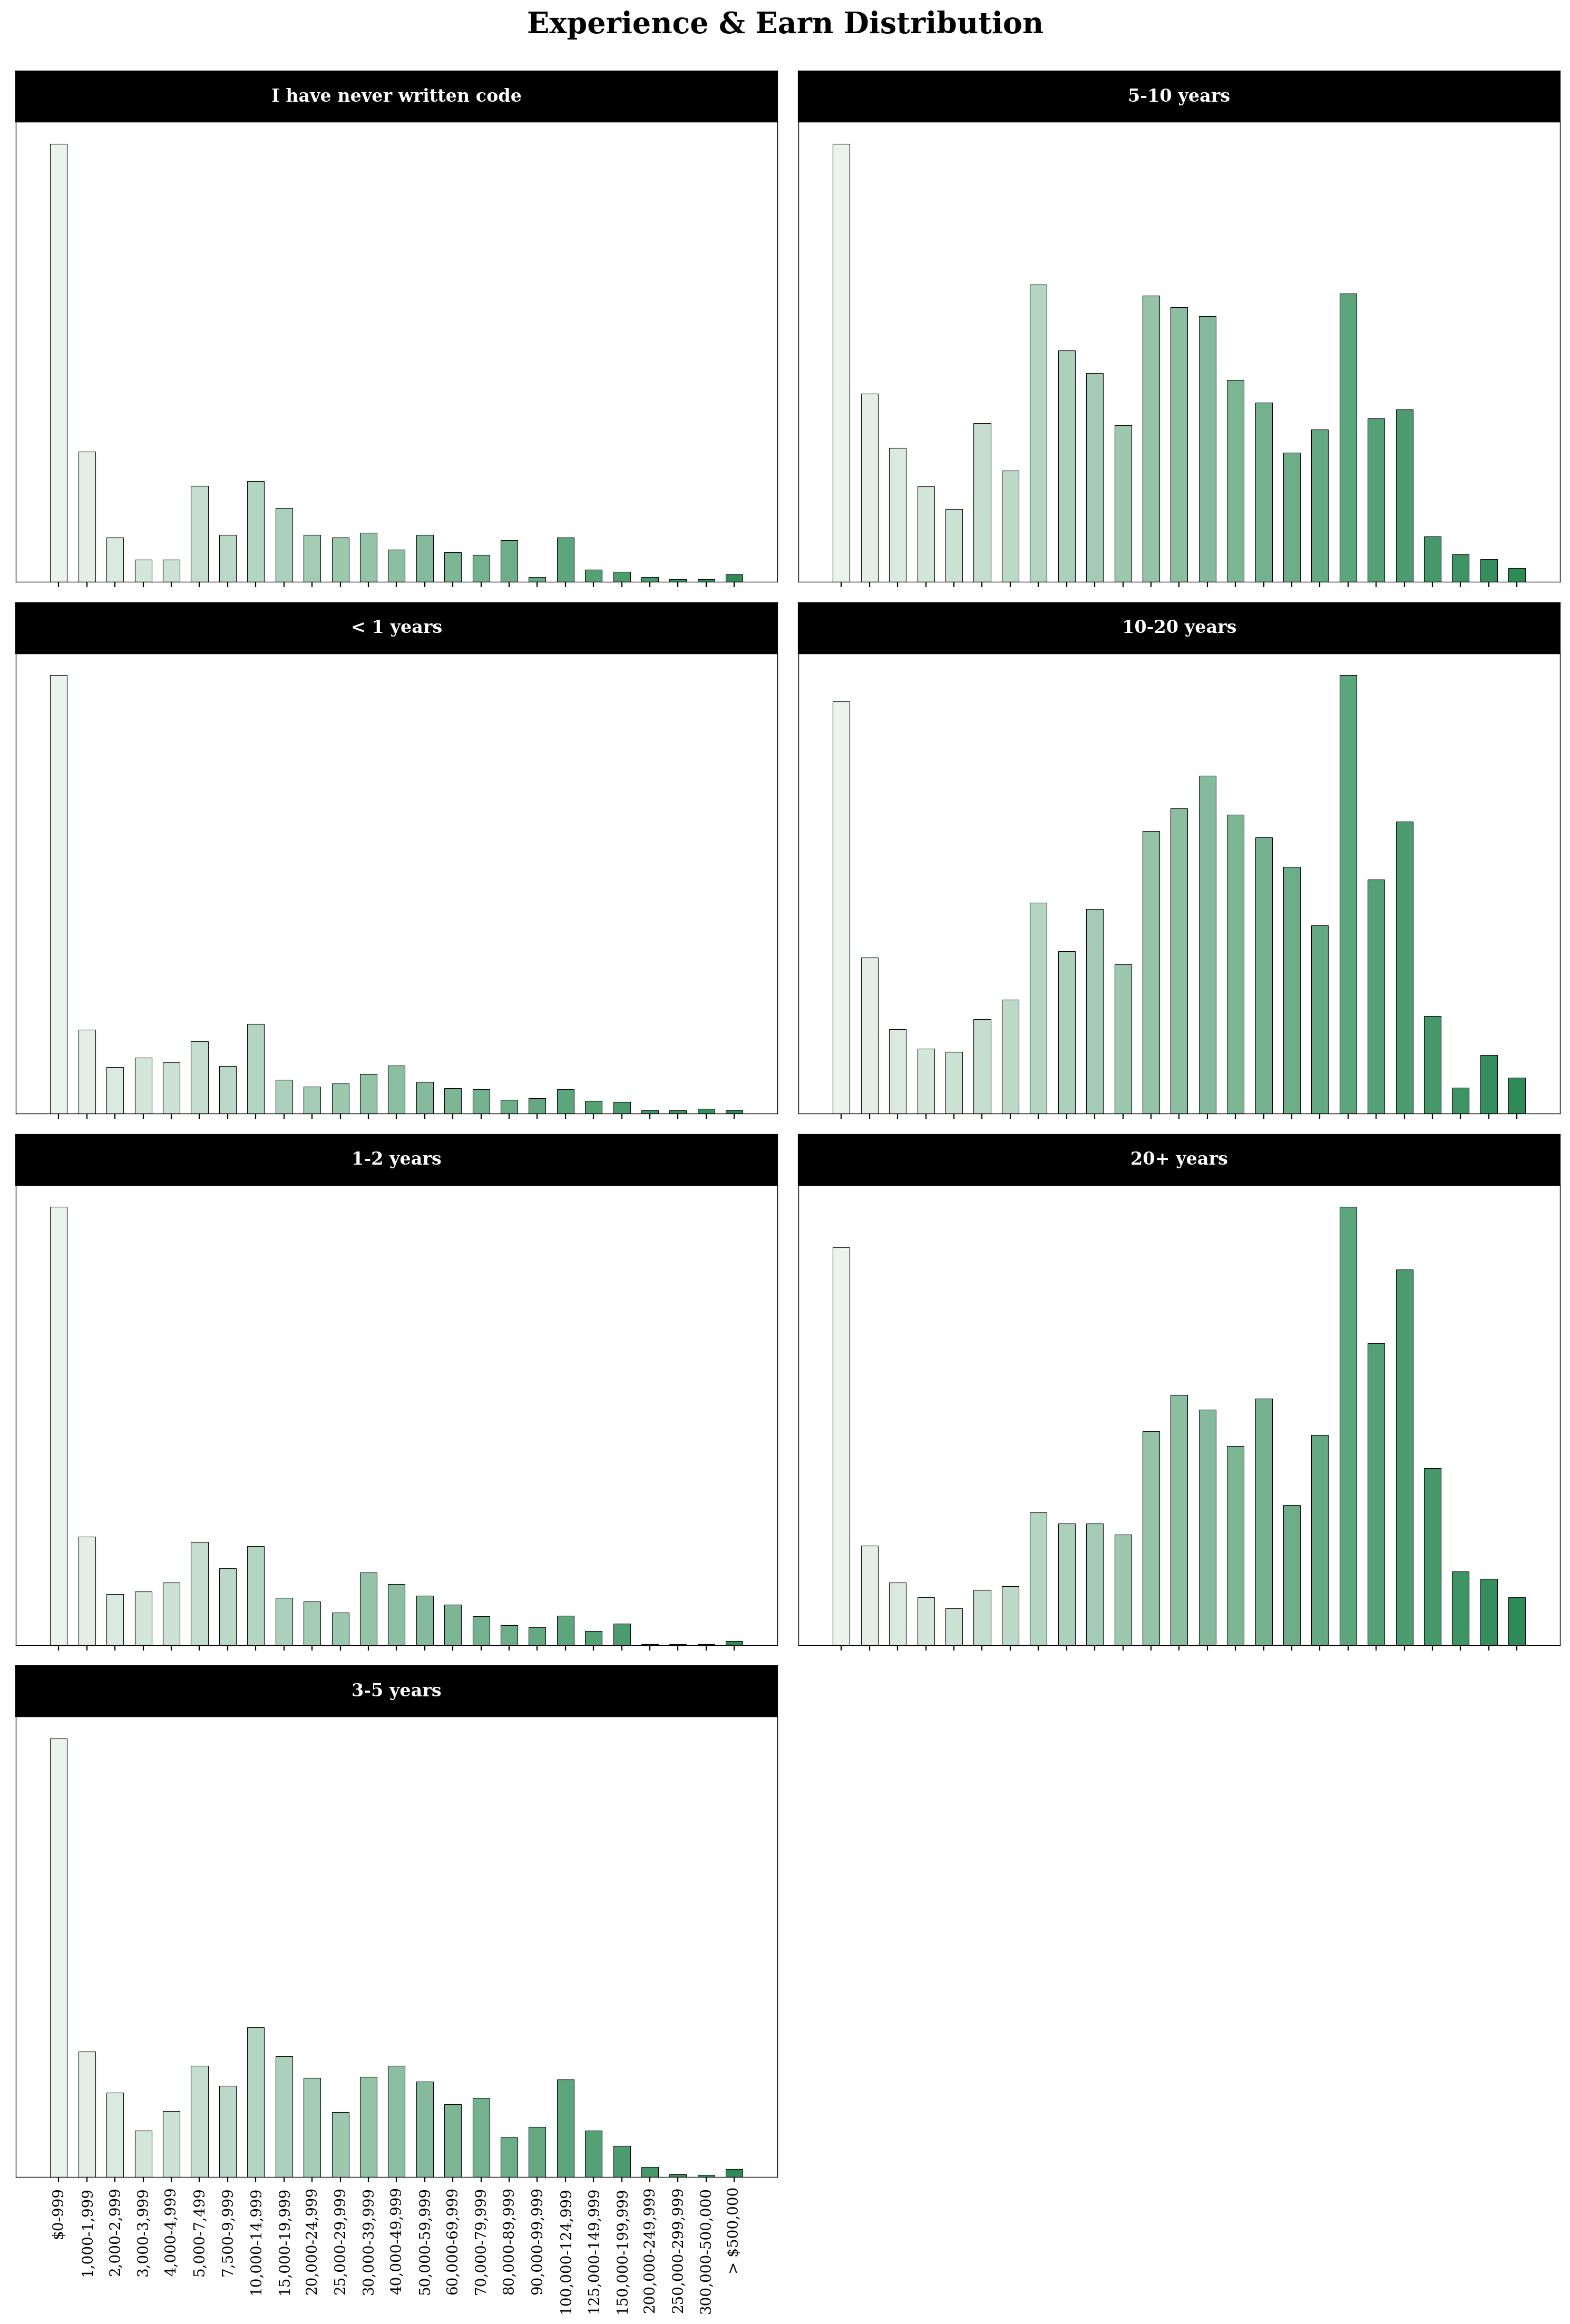

In [213]:
q6q24_data = pd.pivot_table(data, values='count', index=['Q6'], columns=['Q24'], 
                       aggfunc=np.sum).fillna(0).astype('int').loc[q6_order, q24_order]
q6q24_data = q6q24_data.T / q6q24_data.sum(axis=1)
fig, ax = plt.subplots(4, 2, figsize=(15, 22), sharex=True)
colors = sns.light_palette('seagreen', len(q24_order))

for i, index in enumerate(q6q24_data.columns):
    ax[i % 4][i // 4].bar(q6q24_data[index].index, q6q24_data[index], color=colors,
                         width=0.6, edgecolor='black', linewidth=0.4)
    ax[i % 4][i // 4].set_yticks([])
    for j in ['top', 'bottom', 'right', 'left']:
        ax[i % 4][i // 4].spines[j].set_linewidth(0.5)
        
    divider = make_axes_locatable(ax[i % 4][i // 4])
    cax = divider.append_axes('top', size='11%', pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')
    
    at = AnchoredText(index, loc=10, prop=dict(backgroundcolor='black', color='white', 
                                              size=12, family='serif', weight='bold'))
    cax.add_artist(at)
ax[-1][0].set_xticklabels(q24_order, rotation=90, family='serif')
ax[-1][-1].set_visible(False)
fig.suptitle('Experience & Earn Distribution', weight='bold', size=20, family='serif', y=1)
plt.tight_layout()
plt.show()